#**CREDIT RISK ANALYSIS**

###Importing the Necessary Libraries/Modules



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Reading the CSV

In [3]:
df_previous_app = pd.read_csv('/content/drive/MyDrive/Upgrad/EDA_Project/previous_application.csv')
df_data_app = pd.read_csv('/content/drive/MyDrive/Upgrad/EDA_Project/application_data.csv')

In [4]:
print('Rows and Columns are', df_data_app.shape[0],'and', df_data_app.shape[1])

Rows and Columns are 307511 and 122


In [5]:
df_data_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_data_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
#There are 122 columns hence the data is not displayed, we can use iloc to show all the columns in 2 parts (100 + 22)
df_data_app.iloc[:,:100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 100 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [8]:
df_data_app.iloc[:,100:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FLAG_DOCUMENT_6             307511 non-null  int64  
 1   FLAG_DOCUMENT_7             307511 non-null  int64  
 2   FLAG_DOCUMENT_8             307511 non-null  int64  
 3   FLAG_DOCUMENT_9             307511 non-null  int64  
 4   FLAG_DOCUMENT_10            307511 non-null  int64  
 5   FLAG_DOCUMENT_11            307511 non-null  int64  
 6   FLAG_DOCUMENT_12            307511 non-null  int64  
 7   FLAG_DOCUMENT_13            307511 non-null  int64  
 8   FLAG_DOCUMENT_14            307511 non-null  int64  
 9   FLAG_DOCUMENT_15            307511 non-null  int64  
 10  FLAG_DOCUMENT_16            307511 non-null  int64  
 11  FLAG_DOCUMENT_17            307511 non-null  int64  
 12  FLAG_DOCUMENT_18            307511 non-null  int64  
 13  FLAG_DOCUMENT_

###Analyis for Missing Values

In [9]:
#Null values in application data csv
df_data_app.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [10]:
#Getting the percentage of missing Data for df_data_app

df_missing1 = (df_data_app.isnull().sum()/len(df_data_app)*100).sort_values(ascending=False)
df_missing1

,0
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
...,...
NAME_HOUSING_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000
NAME_EDUCATION_TYPE,0.000000
NAME_INCOME_TYPE,0.000000


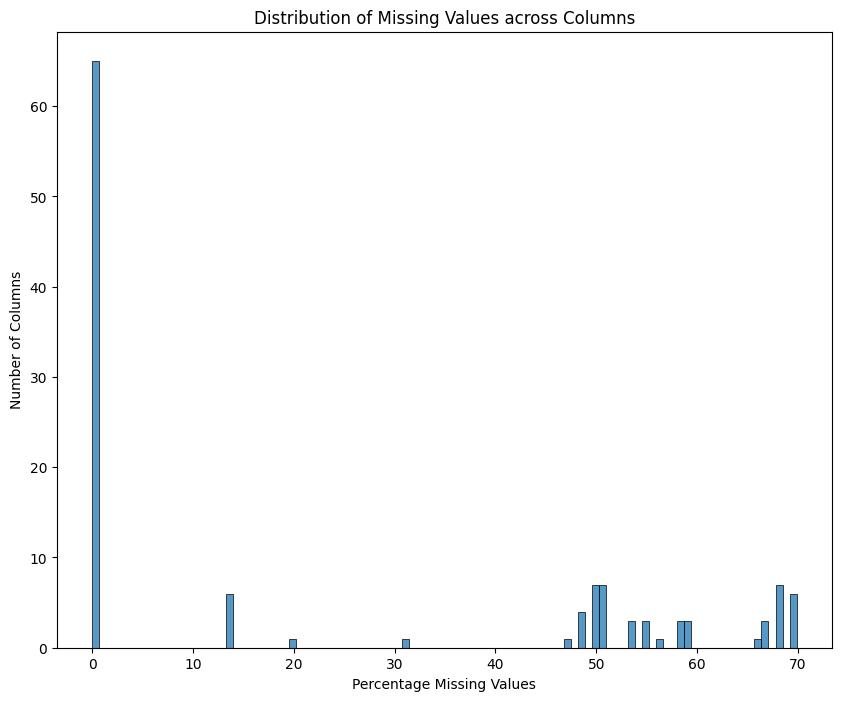

In [11]:
#plot a graph to find out columns with missing values by percentage

plt.figure(figsize=(10,8))
sns.histplot(df_missing1, bins=100)
plt.xlabel('Percentage Missing Values')
plt.ylabel('Number of Columns')
plt.title('Distribution of Missing Values across Columns')
plt.show()

In [12]:
#As we can see, missing data is upto 70% for a few columns, this might not play any role in analysis
#cleaning df_data_app and dropping columns with more than 40% missing data

df_data_app.drop(df_missing1[df_missing1>40].index, axis=1, inplace=True)

#verifying the new shape of data frame
print('New Shape of Dataframe: ',df_data_app.shape)

New Shape of Dataframe:  (307511, 73)


Let's look at the new shape


In [13]:
df_data_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_data_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [15]:
#After cleaning missing percentage more than 50%, the percentage of missing data left is below
((df_data_app.isnull().sum())/len(df_data_app)*100).sort_values(ascending=False)

,0
OCCUPATION_TYPE,31.345545
EXT_SOURCE_3,19.825307
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,13.501631
AMT_REQ_CREDIT_BUREAU_MON,13.501631
...,...
REG_REGION_NOT_LIVE_REGION,0.000000
REG_REGION_NOT_WORK_REGION,0.000000
LIVE_REGION_NOT_WORK_REGION,0.000000
TARGET,0.000000


Let's find out columns where we need to impute values

In [16]:
impute_cols = (df_data_app.isnull().sum())/len(df_data_app)*100

impute_cols_list = impute_cols[impute_cols>0].index.tolist()

impute_cols_list

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

Creating a function to impute missing values


In [17]:
def fill_null(col_name,df,how):
    df[col_name].fillna(how,inplace=True)
    print('Missing Values have been Immputed for',col_name)

In [18]:
#Let's take OCCUPATION_TYPE, EXT_SOURCE_2 and EXT_SOURCE_3 columns
df_data_app[['OCCUPATION_TYPE','EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()

,0
OCCUPATION_TYPE,96391
EXT_SOURCE_2,660
EXT_SOURCE_3,60965


In [19]:
df_data_app['EXT_SOURCE_3'].value_counts(normalize=True)

,proportion
EXT_SOURCE_3,
0.746300,0.005922
0.713631,0.005334
0.694093,0.005176
0.670652,0.004831
0.652897,0.004681
...,...
0.021492,0.000004
0.019468,0.000004
0.023062,0.000004


In [20]:
df_data_app['EXT_SOURCE_2'].value_counts(normalize=True)

,proportion
EXT_SOURCE_2,
0.285898,0.002350
0.262258,0.001359
0.265256,0.001118
0.159679,0.001049
0.265312,0.000997
...,...
0.004725,0.000003
0.257313,0.000003
0.282030,0.000003


In [21]:
df_data_app['OCCUPATION_TYPE'].value_counts()

,count
OCCUPATION_TYPE,
Laborers,55186
Sales staff,32102
Core staff,27570
Managers,21371
Drivers,18603
High skill tech staff,11380
Accountants,9813
Medicine staff,8537
Security staff,6721


In [22]:
#Lets look at CNT_FAM_MEMBERS column, number of missing values
df_data_app['CNT_FAM_MEMBERS'].isnull().sum()

2

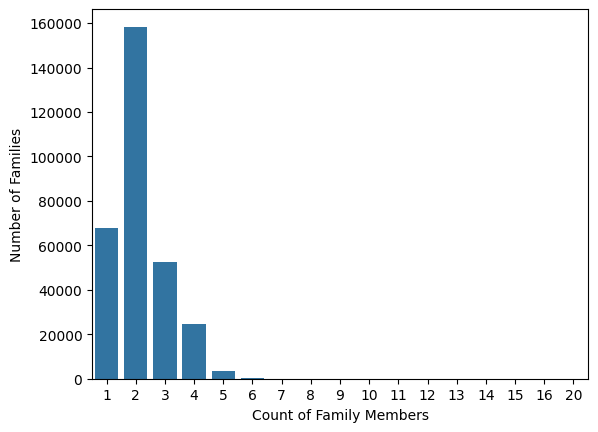

In [23]:
#Lets look at CNT_FAM_MEMBERS column,
df = df_data_app['CNT_FAM_MEMBERS'].value_counts().to_frame(name='Number of Families')
df['Count of Family Members']= df.index.astype('Int64')
df.reset_index(drop=True, inplace=True)
sns.barplot(data=df, x='Count of Family Members', y='Number of Families')
plt.show()

It can be seen that it is safe to impute values as most of the families have 2 family members.

In [24]:
#EXT_SOURCE_3,EXT_SOURCE_2 are normalized scores from data source 3 and 2, we can impute missing values with average value
fill_null('EXT_SOURCE_3',df_data_app,df_data_app['EXT_SOURCE_3'].mean)
fill_null('EXT_SOURCE_2',df_data_app,df_data_app['EXT_SOURCE_2'].mean)
#OCCUPATION_TYPE column has unordered categorical values, we can impute missing values with a value 'Unavailable'
fill_null('OCCUPATION_TYPE',df_data_app,'Unavailable')
#CNT_FAM_MEMBERS can be imputed with the mode
fill_null('CNT_FAM_MEMBERS',df_data_app,df_data_app['CNT_FAM_MEMBERS'].mode)

Missing Values have been Immputed for EXT_SOURCE_3
Missing Values have been Immputed for EXT_SOURCE_2
Missing Values have been Immputed for OCCUPATION_TYPE
Missing Values have been Immputed for CNT_FAM_MEMBERS


In [25]:
#Let's verify Null Values for OCCUPATION_TYPE, EXT_SOURCE_2 and EXT_SOURCE_3 columns
df_data_app[['OCCUPATION_TYPE','EXT_SOURCE_2','EXT_SOURCE_3']].isnull().sum()

,0
OCCUPATION_TYPE,0
EXT_SOURCE_2,0
EXT_SOURCE_3,0


In [26]:
#Function to plot subplot for the AMT_* columns
def bar_plot(col_list):
    plt.figure(figsize=[18,10])
    i=1
    for col in col_list:
        plt.subplot(2,3,i)
        tmp = df_data_app[col].value_counts(normalize=True)*100
        tmp.plot.bar().set(xlabel= 'No of '+str(col.split('_')[-1]), ylabel='Percent count of records',title= 'No of '+str(col.split('_')[-1])+' vs Percent Count of records')

        i+=1
    plt.tight_layout(pad=2.0)
    plt.show()

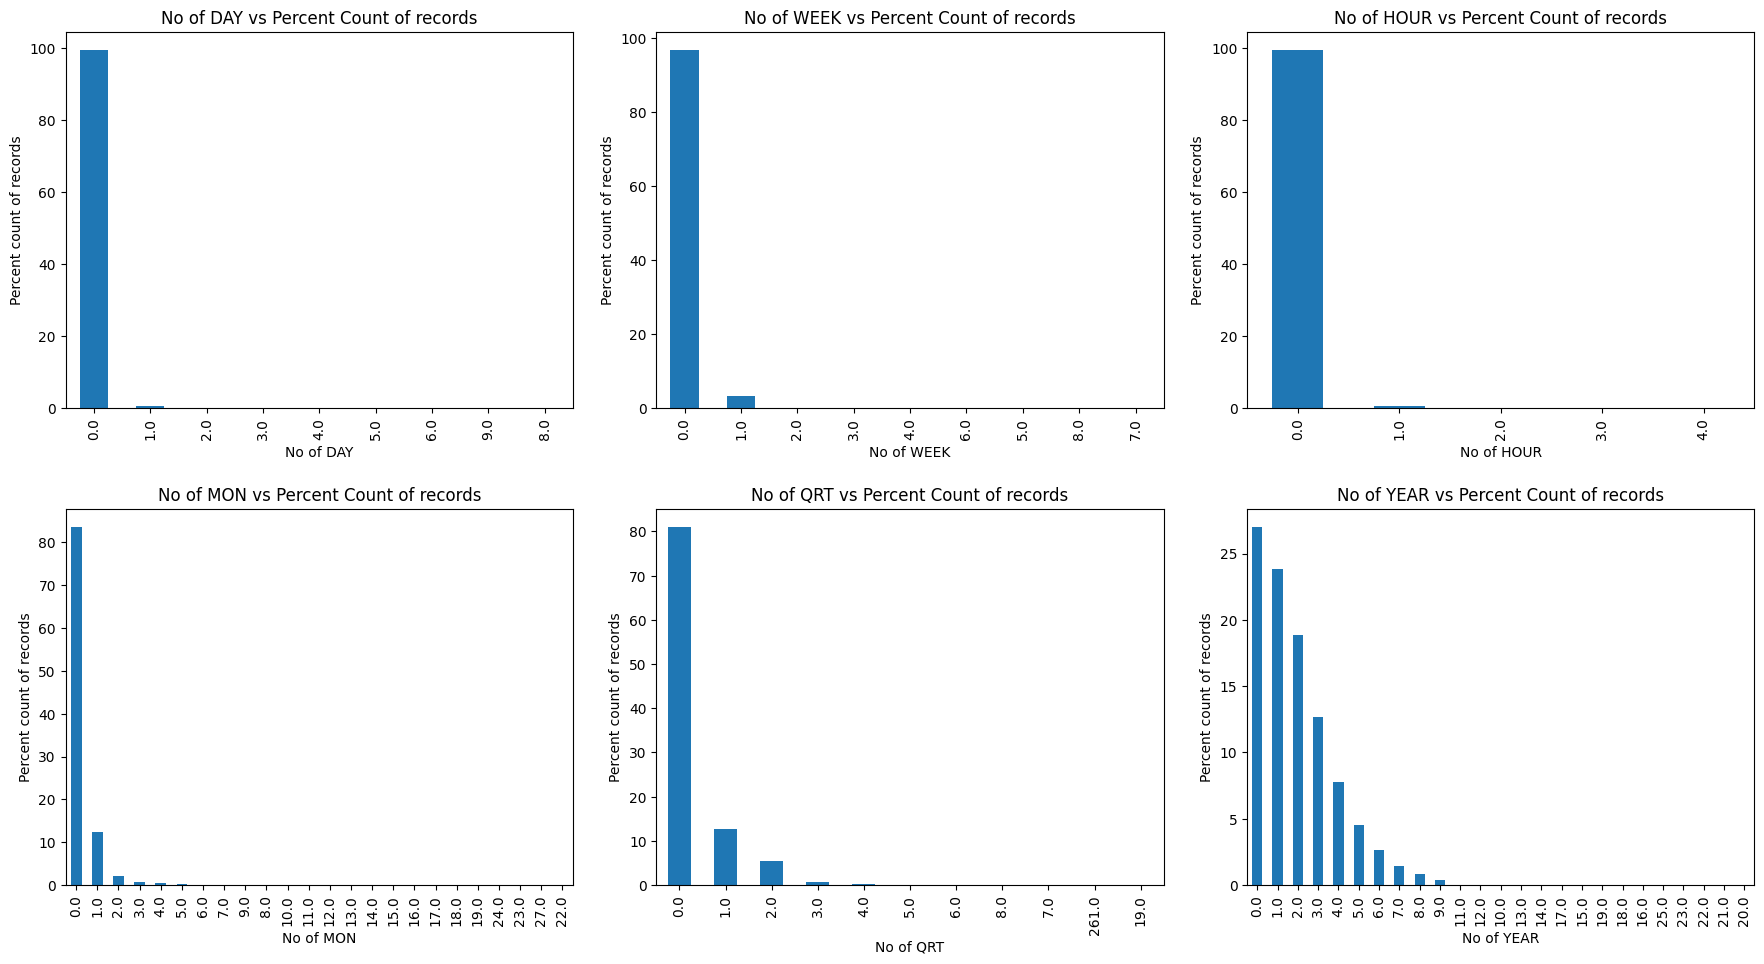

In [27]:
list_Cols = ['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
bar_plot(list_Cols)

As most of the values in AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_MON,
AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_QRT columns are 0, it is safe to impute missing values with 0

In [28]:
df_data_app.fillna({'AMT_REQ_CREDIT_BUREAU_HOUR':0,
 'AMT_REQ_CREDIT_BUREAU_DAY':0,
 'AMT_REQ_CREDIT_BUREAU_WEEK':0,
 'AMT_REQ_CREDIT_BUREAU_MON':0,
 'AMT_REQ_CREDIT_BUREAU_QRT':0,
 'AMT_REQ_CREDIT_BUREAU_YEAR':df_data_app['AMT_REQ_CREDIT_BUREAU_YEAR'].median()},inplace=True)

###Data Cleaning


In [29]:
#let's see the data types of columns first.
df_data_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [30]:
##let's find out columns with object data types
obj_cols = df_data_app.select_dtypes(include=[object]).columns.tolist()
obj_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

In [31]:
df_data_app['NAME_CONTRACT_TYPE'].value_counts()

,count
NAME_CONTRACT_TYPE,
Cash loans,278232
Revolving loans,29279


In [32]:
df_data_app['CODE_GENDER'].value_counts()


,count
CODE_GENDER,
F,202448
M,105059
XNA,4


In [33]:
#There are 4 records with XNA.
drop_genders = df_data_app[df_data_app['CODE_GENDER'] =="XNA"].index
df_data_app.drop(drop_genders, inplace=True)

In [34]:
df_data_app['CODE_GENDER'].value_counts()


,count
CODE_GENDER,
F,202448
M,105059


In [35]:
df_data_app['FLAG_OWN_CAR'].value_counts()

,count
FLAG_OWN_CAR,
N,202922
Y,104585


In [36]:

df_data_app['FLAG_OWN_REALTY'].value_counts()

,count
FLAG_OWN_REALTY,
Y,213308
N,94199


In [37]:

df_data_app['NAME_TYPE_SUITE'].value_counts()

,count
NAME_TYPE_SUITE,
Unaccompanied,248523
Family,40148
"Spouse, partner",11370
Children,3267
Other_B,1770
Other_A,866
Group of people,271


In [38]:

df_data_app['NAME_INCOME_TYPE'].value_counts()

,count
NAME_INCOME_TYPE,
Working,158771
Commercial associate,71616
Pensioner,55362
State servant,21703
Unemployed,22
Student,18
Businessman,10
Maternity leave,5


In [39]:

df_data_app['NAME_EDUCATION_TYPE'].value_counts()

,count
NAME_EDUCATION_TYPE,
Secondary / secondary special,218389
Higher education,74862
Incomplete higher,10276
Lower secondary,3816
Academic degree,164


In [40]:

df_data_app['NAME_FAMILY_STATUS'].value_counts()

,count
NAME_FAMILY_STATUS,
Married,196429
Single / not married,45444
Civil marriage,29774
Separated,19770
Widow,16088
Unknown,2


In [41]:

df_data_app['NAME_HOUSING_TYPE'].value_counts()

,count
NAME_HOUSING_TYPE,
House / apartment,272865
With parents,14840
Municipal apartment,11182
Rented apartment,4881
Office apartment,2617
Co-op apartment,1122


In [42]:

df_data_app['OCCUPATION_TYPE'].value_counts()

,count
OCCUPATION_TYPE,
Unavailable,96389
Laborers,55186
Sales staff,32102
Core staff,27569
Managers,21371
Drivers,18603
High skill tech staff,11380
Accountants,9813
Medicine staff,8537


In [43]:

df_data_app['CNT_FAM_MEMBERS'].value_counts()

,count
CNT_FAM_MEMBERS,
2.0,158355
1.0,67847
3.0,52600
4.0,24696
5.0,3478
6.0,408
7.0,81
8.0,20
9.0,6


In [44]:

df_data_app['WEEKDAY_APPR_PROCESS_START'].value_counts()

,count
WEEKDAY_APPR_PROCESS_START,
TUESDAY,53900
WEDNESDAY,51934
MONDAY,50714
THURSDAY,50590
FRIDAY,50336
SATURDAY,33852
SUNDAY,16181


In [45]:

df_data_app['ORGANIZATION_TYPE'].value_counts()

,count
ORGANIZATION_TYPE,
Business Entity Type 3,67992
XNA,55374
Self-employed,38412
Other,16683
Medicine,11192
Business Entity Type 2,10553
Government,10404
School,8893
Trade: type 7,7831


Rest of the columns with object dtype seem fine, let's look at numeric dtype columns now

In [46]:
int_cols = df_data_app.select_dtypes(np.int64).columns.tolist()
df_data_app[int_cols]

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,-9327,-236,-1982,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,0,-20775,365243,-4090,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,0,-14966,-7921,-5150,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,-11961,-4786,-931,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
int_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [48]:
#Analysing the column values
df_data_app[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
0,-9461,-637,-2120
1,-16765,-1188,-291
2,-19046,-225,-2531
3,-19005,-3039,-2437
4,-19932,-3038,-3458


In [49]:
df_data_app['DAYS_BIRTH'] = (df_data_app['DAYS_BIRTH'].abs()/365).round()
df_data_app['DAYS_EMPLOYED'] = (df_data_app['DAYS_EMPLOYED'].abs()/365).round()
df_data_app['DAYS_ID_PUBLISH'] = (df_data_app['DAYS_ID_PUBLISH'].abs()/365).round()

In [50]:
df_data_app[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
0,26.0,2.0,6.0
1,46.0,3.0,1.0
2,52.0,1.0,7.0
3,52.0,8.0,7.0
4,55.0,8.0,9.0


In [51]:
float_cols = df_data_app.select_dtypes(np.float64).columns.tolist()
df_data_app[float_cols].head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,26.0,2.0,-3648.0,6.0,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,46.0,3.0,-1186.0,1.0,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,52.0,1.0,-4260.0,7.0,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,52.0,8.0,-9833.0,7.0,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,55.0,8.0,-4311.0,9.0,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Let's change the dtype of DAYS_REGISTRATION and DAYS_LAST_PHONE_CHANGE columns as they should have been of integer type.

df_data_app['DAYS_REGISTRATION'] = (df_data_app['DAYS_REGISTRATION'].abs()/365).round()
df_data_app['DAYS_LAST_PHONE_CHANGE'] = (df_data_app['DAYS_LAST_PHONE_CHANGE'].abs()/365).round()


In [53]:
df_data_app['DAYS_LAST_PHONE_CHANGE']

,DAYS_LAST_PHONE_CHANGE
0,3.0
1,2.0
2,2.0
3,2.0
4,3.0
...,...
307506,1.0
307507,0.0
307508,5.0
307509,1.0


###Handling Outliers

In [54]:
num_cols = df_data_app.select_dtypes([np.int64,np.float64]).columns.tolist()
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLA

In [55]:
#we had a look at the numeric columns first, now let's plot the box plots to find out the outliers. let's create a function for the same as number of columns are high.

def box_plot(df,col_list):
    plt.figure(figsize=[16,12])
    i=1
    for col in col_list:
        plt.subplot(2,3,i)
        sns.boxplot(data=df[col]).set(title='Box plot for '+col.replace('_',' '))
        i+=1
    plt.tight_layout(pad=2.0)
    plt.show()

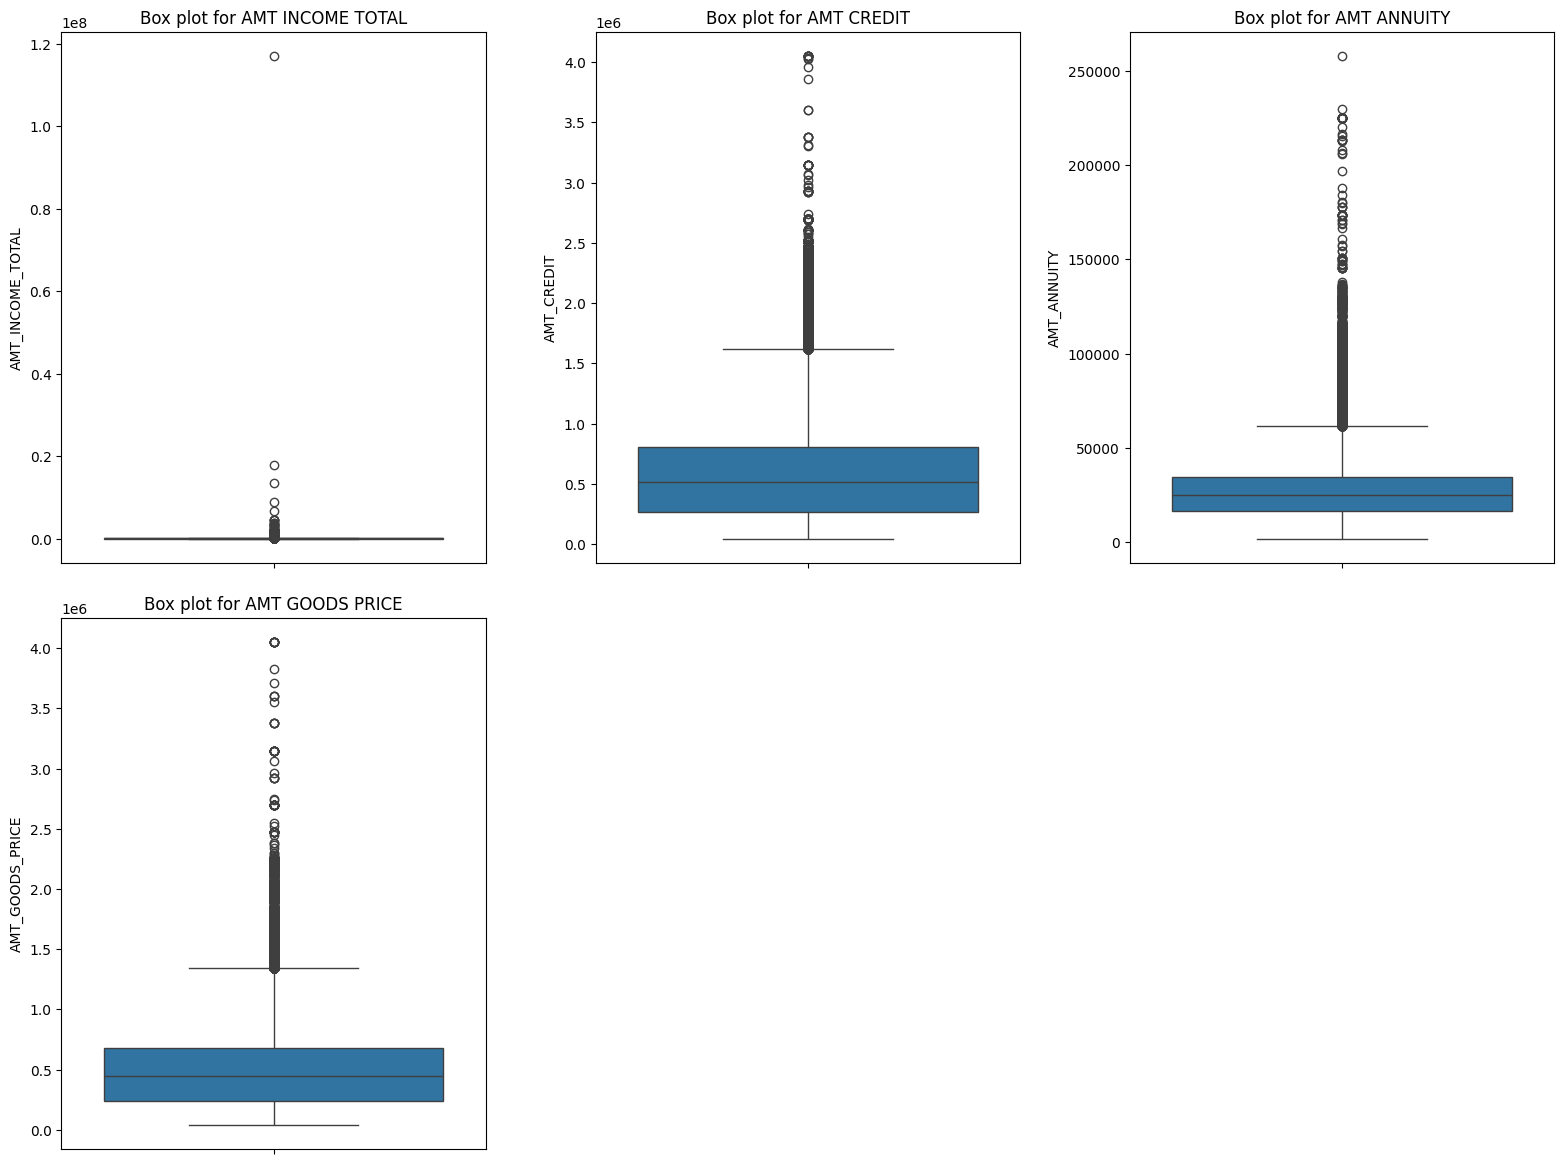

In [56]:
col_list = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
box_plot(df_data_app,col_list)

In [57]:
#Let's remove the outliers.

(df_data_app[col_list]/1000).describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,307507.000000,307507.000000,307495.000000,307229.000000
mean,168.797686,599.028597,27.108667,538.397724
std,237.124627,402.492602,14.493798,369.447246
min,25.650000,45.000000,1.615500,40.500000
25%,112.500000,270.000000,16.524000,238.500000
50%,147.150000,513.531000,24.903000,450.000000
75%,202.500000,808.650000,34.596000,679.500000
max,117000.000000,4050.000000,258.025500,4050.000000


In [58]:
INCOME_90 = df_data_app['AMT_INCOME_TOTAL'].quantile(q=0.9)
#removing the values above 90th quantile

In [59]:
CREDIT_95 = df_data_app['AMT_CREDIT'].quantile(q=0.95)
#removing the values above 95th quantile

In [60]:
ANNUITY_97 = df_data_app['AMT_ANNUITY'].quantile(q=0.97)
#removing the values above 97th quantile

In [61]:
GOODS_PRICE_97 = df_data_app['AMT_GOODS_PRICE'].quantile(q=0.97)
#removing the values above 97th quantile

In [62]:
#Capping Outliers for AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE

In [63]:
#created a copy of the dataframe and removed outliers from it

app_data_final=df_data_app.copy()
app_data_final=app_data_final[app_data_final['AMT_INCOME_TOTAL'] <=INCOME_90]
app_data_final=app_data_final[app_data_final['AMT_ANNUITY'] <=ANNUITY_97]
app_data_final=app_data_final[app_data_final['AMT_GOODS_PRICE'] <=GOODS_PRICE_97]
app_data_final=app_data_final[app_data_final['AMT_CREDIT'] <=CREDIT_95]


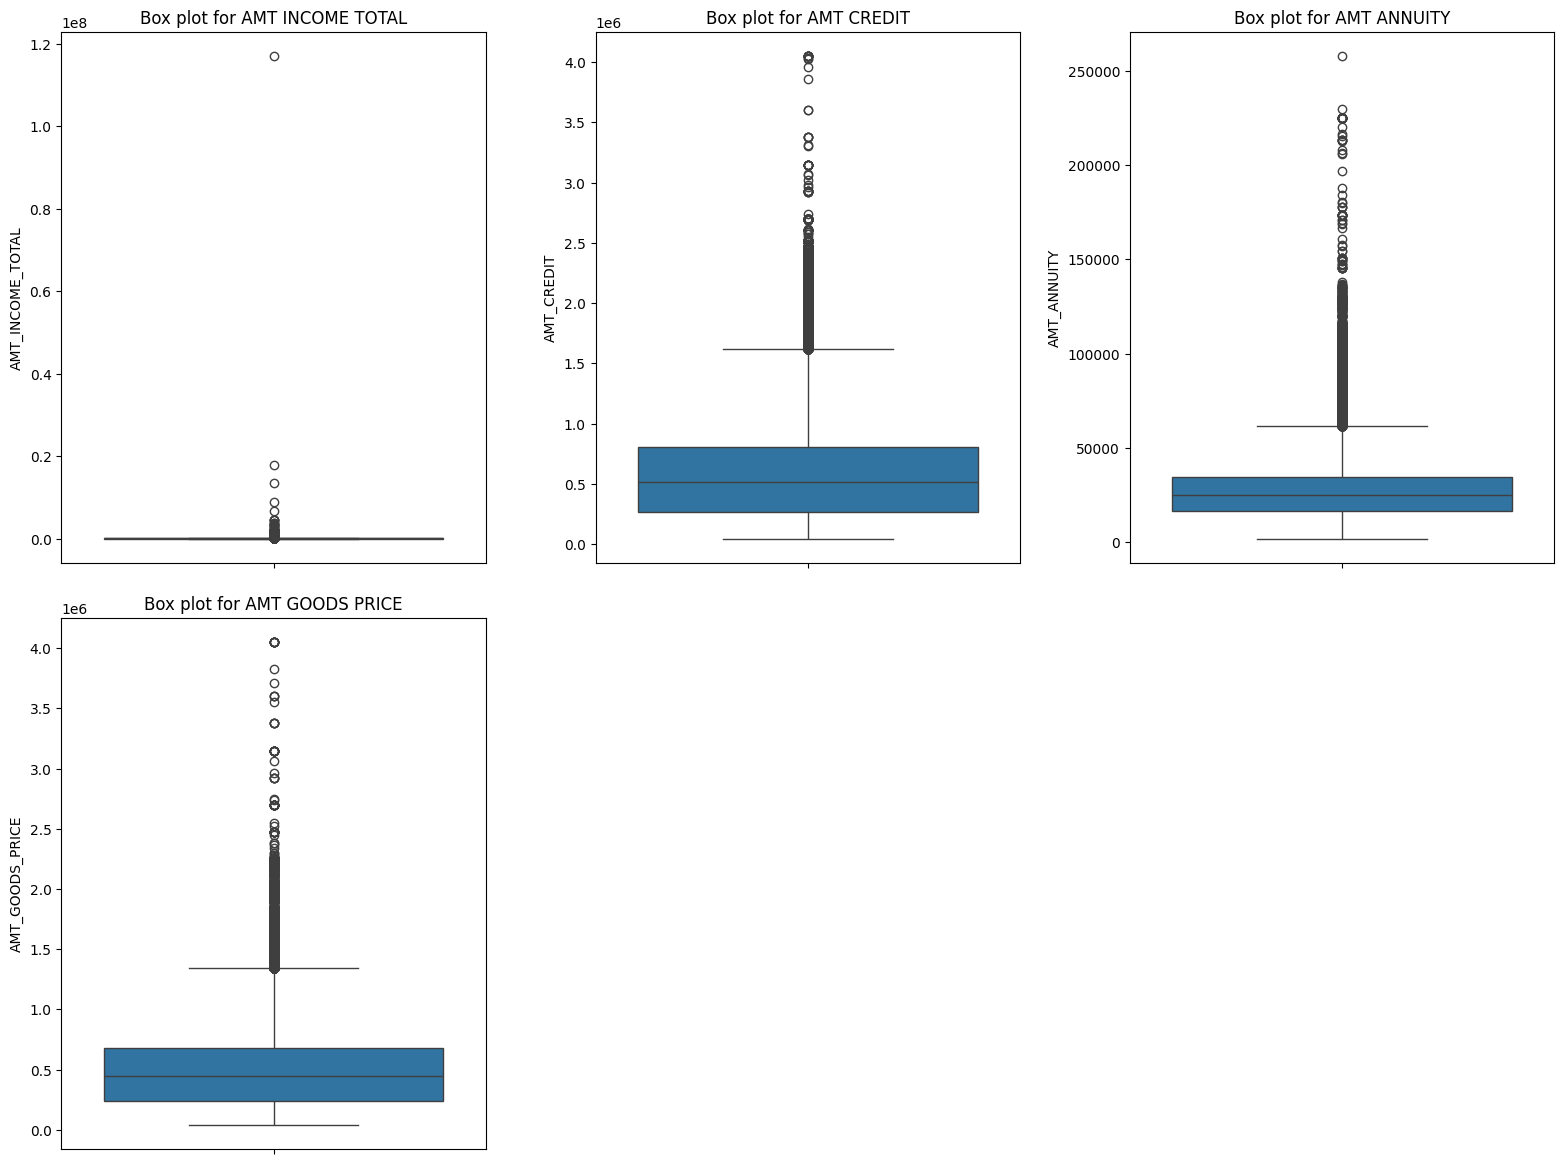

In [64]:
#let's verify the columns after removing the outliers

box_plot(df_data_app,col_list)

From the above graphs we can see that the most of the outliers have been removed

In [65]:
app_data_final.shape

(267722, 73)

In [66]:
app_data_final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
#There are AMT_* columns and Age_Years which has continous numerical values, hence we can bin them

#let's see the distribution of Ages
app_data_final['DAYS_BIRTH'].describe()

,DAYS_BIRTH
count,267722.000000
mean,43.958449
std,12.172166
min,21.000000
25%,34.000000
50%,43.000000
75%,54.000000
max,69.000000


In [68]:
#Binning the Age column
cut_labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80']
cut_bins = [0, 10,20,30,40,50,60,70,80]
app_data_final['Age_Groups'] = pd.cut(df_data_app['DAYS_BIRTH'], bins=cut_bins, labels=cut_labels)
app_data_final['Age_Groups'].value_counts()

,count
Age_Groups,
31-40,70928
41-50,63558
51-60,58953
21-30,44392
61-70,29891
0-10,0
11-20,0
71-80,0


In [69]:
app_data_final['AMT_INCOME_TOTAL'].describe()

,AMT_INCOME_TOTAL
count,267722.000000
mean,144649.673051
std,54793.446538
min,25650.000000
25%,106200.000000
50%,135000.000000
75%,180000.000000
max,270000.000000


In [70]:
#Binning the Income column
cut_lbl = ['0-50000', '50001-100000', '100001-150000', '150001-200000','200001-250000','250001-300000']
cut_bns = [0, 50000, 100000, 150000, 200000, 250000, 300000]
app_data_final['INCOME_GROUP'] = pd.cut(app_data_final['AMT_INCOME_TOTAL'], bins=cut_bns, labels=cut_lbl)

In [71]:
app_data_final['INCOME_GROUP']

,INCOME_GROUP
0,200001-250000
1,250001-300000
2,50001-100000
3,100001-150000
4,100001-150000
...,...
307506,150001-200000
307507,50001-100000
307508,150001-200000
307509,150001-200000


###Univariate Analysis

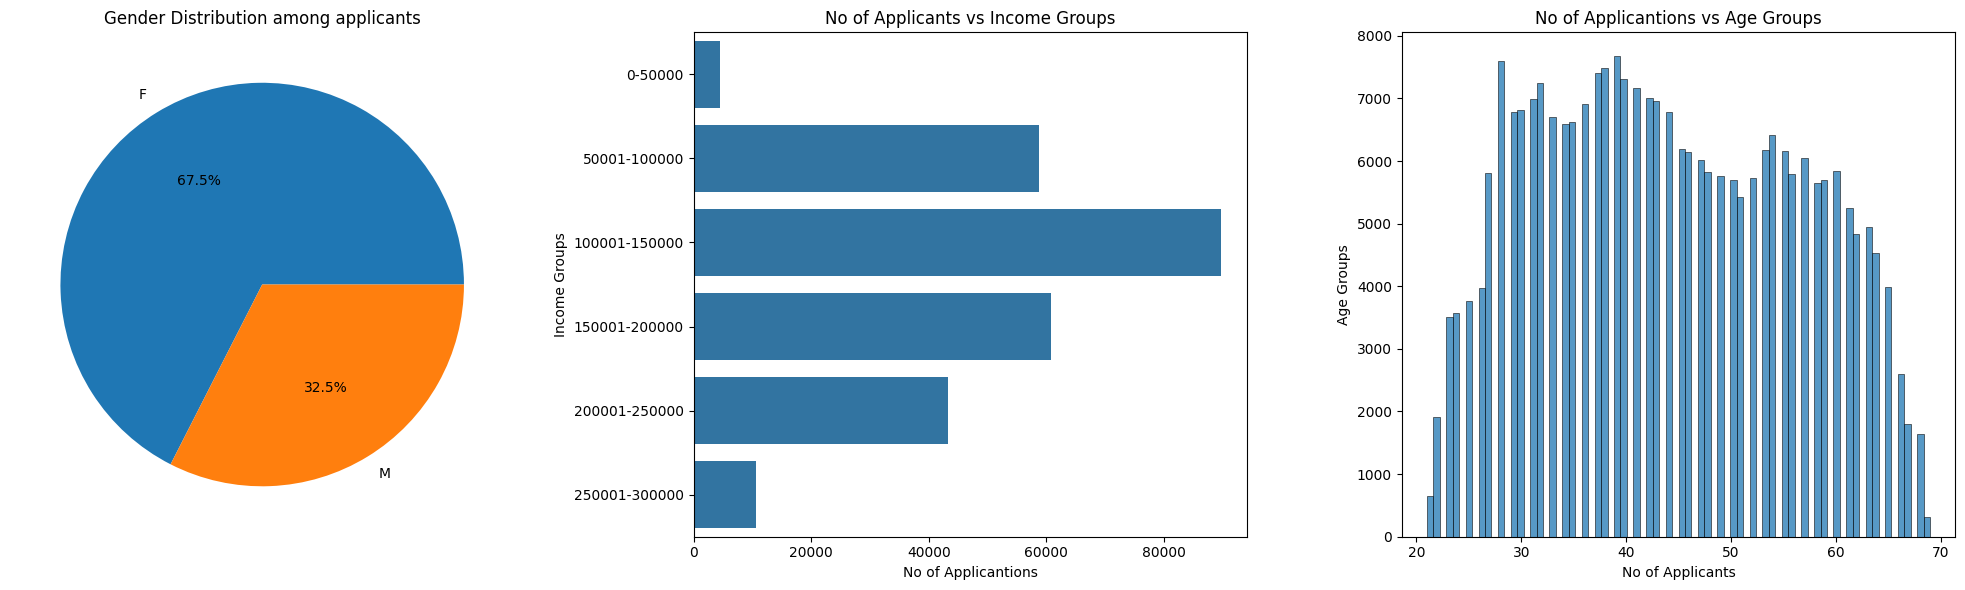

In [72]:
#Lets see how is the distribution of the data in few key columns.

plt.figure(figsize=[20,6])

plt.subplot(1,3,1)

GENDER = app_data_final['CODE_GENDER'].value_counts(normalize=True).rename_axis('Gender').reset_index(name='Count')
plt.pie(data=GENDER, x=GENDER.Count, labels=GENDER.Gender, autopct='%1.1f%%')
plt.title('Gender Distribution among applicants')

plt.subplot(1,3,2)
INCOME = app_data_final['INCOME_GROUP'].value_counts().rename_axis('Income_Groups').reset_index(name='Income Amount')
sns.barplot(y=INCOME.Income_Groups, x=INCOME['Income Amount']).set(xlabel='No of Applicantions', ylabel='Income Groups', title='No of Applicants vs Income Groups')

plt.subplot(1,3,3)
AGE = app_data_final['DAYS_BIRTH']
sns.histplot(AGE).set(xlabel='No of Applicants', ylabel='Age Groups', title='No of Applicantions vs Age Groups')


plt.tight_layout()
plt.show()

The percentage of females is higher compared to males in loan applications.

Higher loan applications have come from applicants with income group 100001-150000

Applications are higher in age group 31-40

In [73]:
#let's divide them as defaulters and non-defaulters
target_1 = app_data_final[app_data_final['TARGET']==1].iloc[:,1:]   #Defaullter
target_0 = app_data_final[app_data_final['TARGET']==0].iloc[:,1:]   #NOn-Defaulter

In [74]:
#lets observe Target-1
target_1.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Groups,INCOME_GROUP
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,21-30,200001-250000
26,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,...,0,0,0.0,0.0,0.0,0.0,2.0,2.0,51-60,100001-150000
40,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,...,0,0,0.0,0.0,0.0,2.0,0.0,4.0,41-50,200001-250000
42,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,2.0,31-40,100001-150000
81,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,61-70,50001-100000


In [75]:
#lets observe Target-0
target_0.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Groups,INCOME_GROUP
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,41-50,250001-300000
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,51-60,50001-100000
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,51-60,100001-150000
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,51-60,100001-150000
5,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0.0,0.0,0.0,0.0,1.0,1.0,41-50,50001-100000


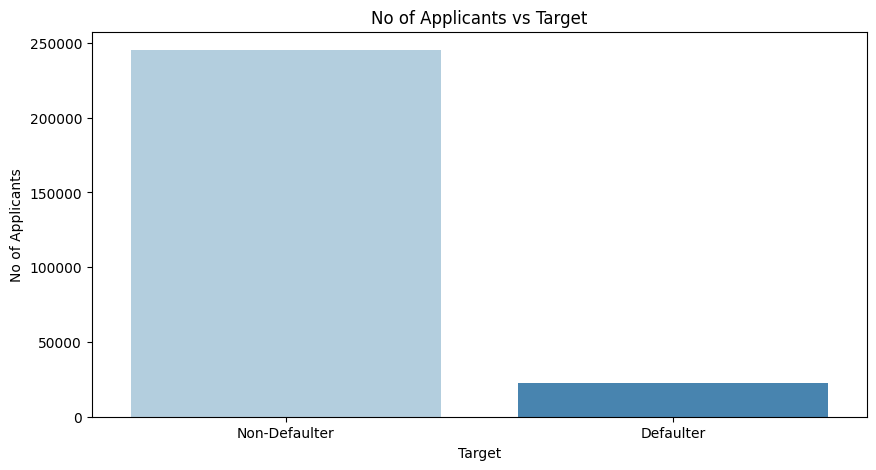

In [76]:
#plotting bar of column target from app_data_final

plt.figure(figsize=[10,5])
sns.barplot(app_data_final['TARGET'].value_counts(), palette='Blues')
plt.xlabel('Target')
plt.ylabel('No of Applicants')
plt.title('No of Applicants vs Target')
plt.xticks([0,1],['Non-Defaulter','Defaulter'])
plt.show()


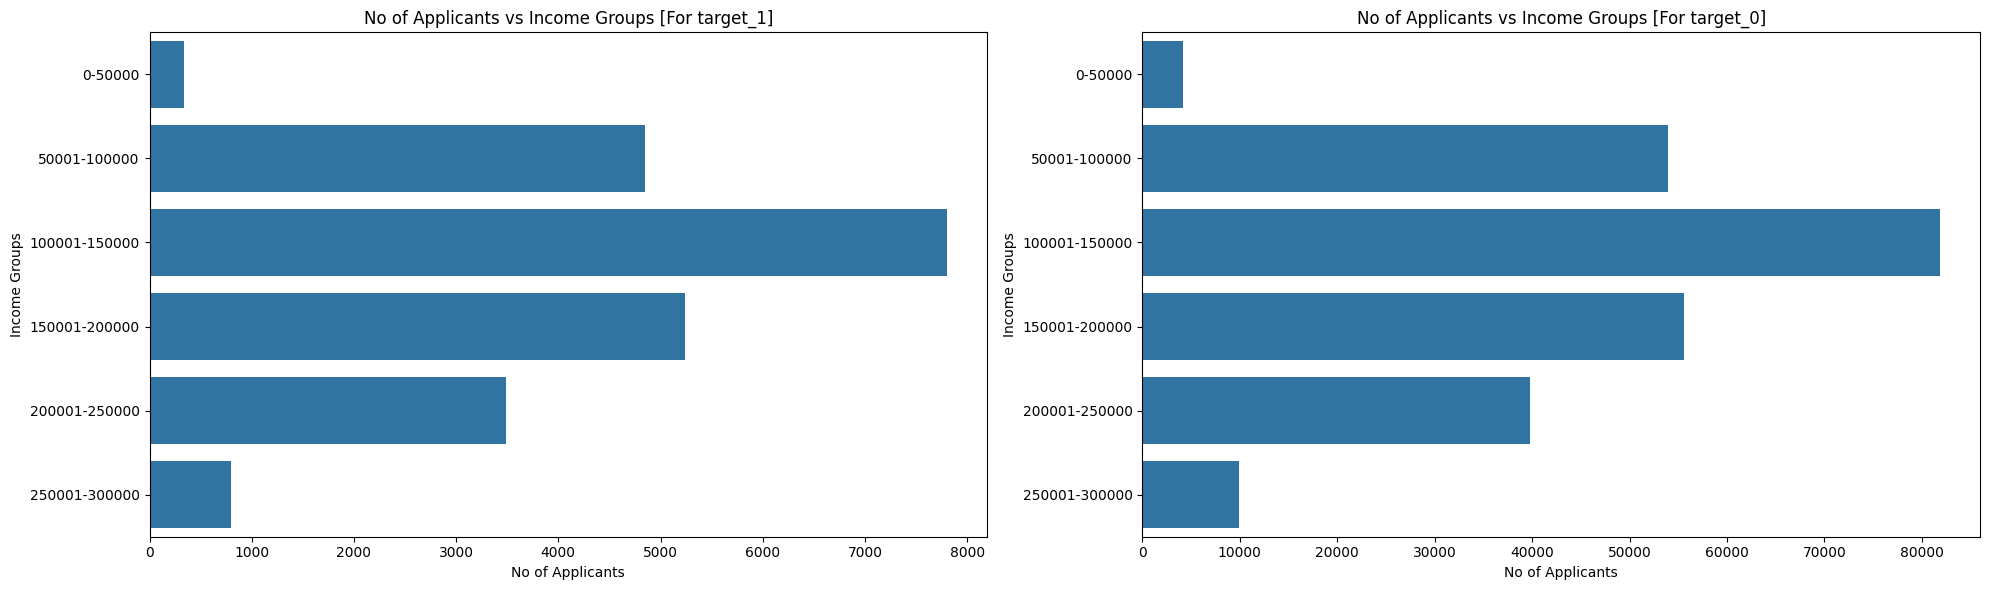

In [77]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
INCOME1 = target_1['INCOME_GROUP'].value_counts().rename_axis('Income_Groups').reset_index(name='No of Applicants')
sns.barplot(y=INCOME1['Income_Groups'], x=INCOME1['No of Applicants']).set(xlabel='No of Applicants', ylabel='Income Groups', title='No of Applicants vs Income Groups [For target_1]')

plt.subplot(1,2,2)
INCOME0 = target_0['INCOME_GROUP'].value_counts().rename_axis('Income_Groups').reset_index(name='No of Applicants')
sns.barplot(y=INCOME0['Income_Groups'], x=INCOME0['No of Applicants']).set(xlabel='No of Applicants', ylabel='Income Groups', title='No of Applicants vs Income Groups [For target_0]')


plt.tight_layout()
plt.show()


####The number of applications in income group 100001-150000 have most defaults as well as success. Whereas, income group 0-50000 has lowest defaults as well as non-defaults

##Bivariate Analysis

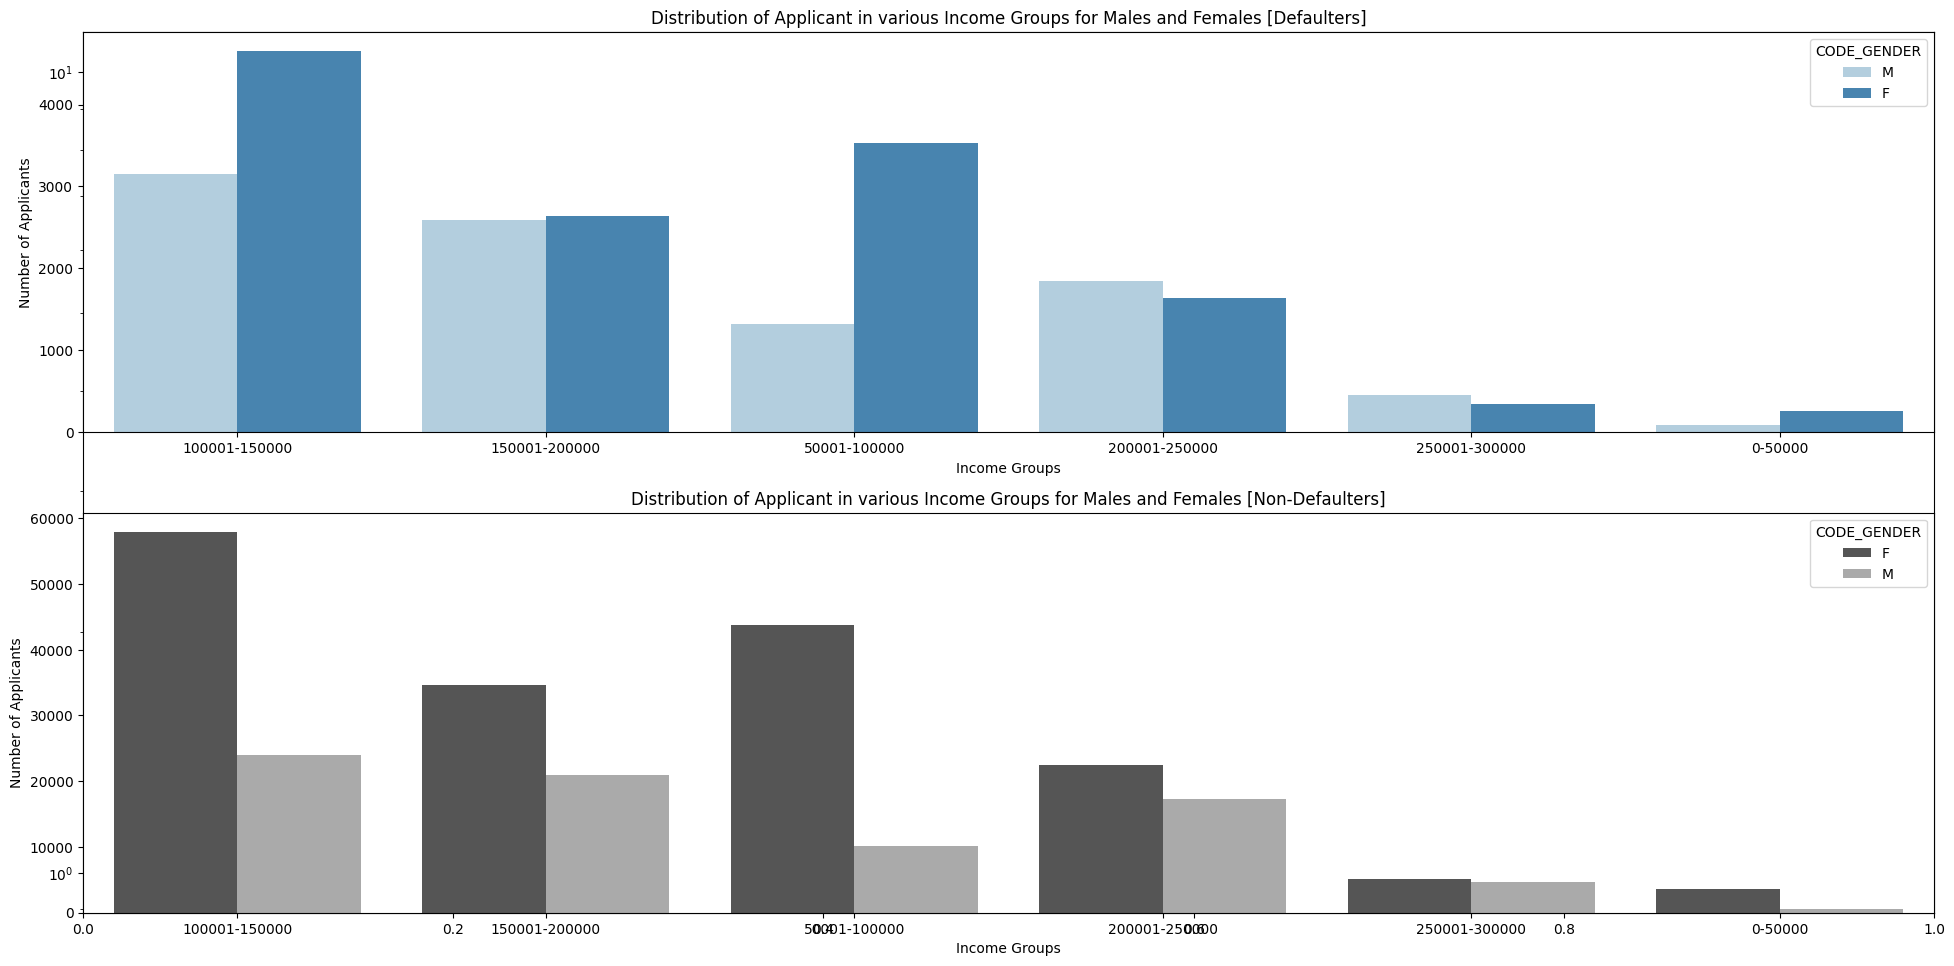

In [78]:
plt.figure(figsize=[20,10])
plt.yscale('log')
plt.subplot(211)
sns.countplot(data = target_1, x='INCOME_GROUP' , order=target_1['INCOME_GROUP'].value_counts().index,hue = target_1['CODE_GENDER'],palette='Blues').set(xlabel='Income Groups', ylabel='Number of Applicants', title='Distribution of Applicant in various Income Groups for Males and Females [Defaulters]')
plt.subplot(212)
sns.countplot(data = target_0, x='INCOME_GROUP' , order=target_0['INCOME_GROUP'].value_counts().index,hue = target_0['CODE_GENDER'],palette='gray').set(xlabel='Income Groups', ylabel='Number of Applicants', title='Distribution of Applicant in various Income Groups for Males and Females [Non-Defaulters]')
plt.tight_layout()
plt.show()

Number of loan applications from females are greater in all the income groups.

In [79]:
week_days = target_1.WEEKDAY_APPR_PROCESS_START.value_counts().rename_axis('Week_Days').reset_index(name='No. of Applicants')
week_days

,Week_Days,No. of Applicants
0,TUESDAY,4080
1,WEDNESDAY,3851
2,FRIDAY,3729
3,THURSDAY,3679
4,MONDAY,3546
5,SATURDAY,2455
6,SUNDAY,1180


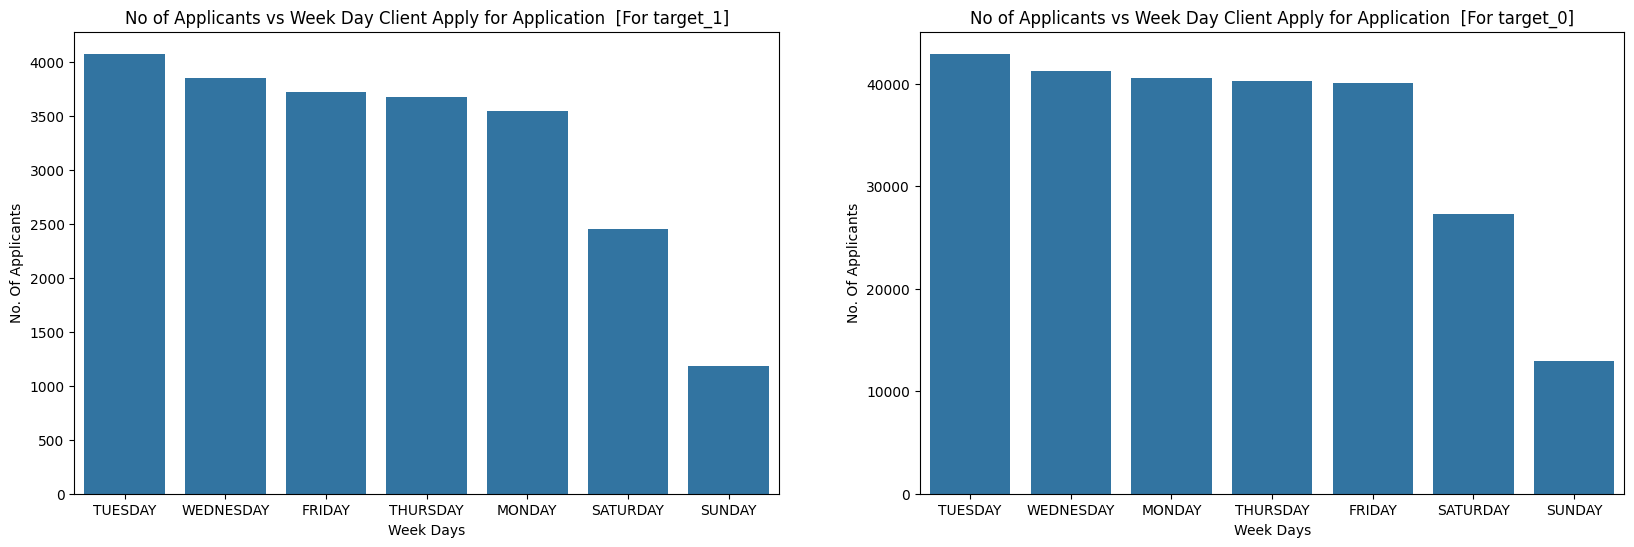

In [80]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)

week_days = target_1['WEEKDAY_APPR_PROCESS_START'].value_counts().rename_axis('Week_Days').reset_index(name='No. of Applicants')
sns.barplot(y=week_days['No. of Applicants'], x=week_days.Week_Days).set(xlabel='Week Days', ylabel='No. Of Applicants', title='No of Applicants vs Week Day Client Apply for Application  [For target_1]')

plt.subplot(1,2,2)
week_days = target_0['WEEKDAY_APPR_PROCESS_START'].value_counts().rename_axis('Week_Days').reset_index(name='No. of Applicants')
sns.barplot(y=week_days['No. of Applicants'], x=week_days.Week_Days).set(xlabel='Week Days', ylabel='No. Of Applicants', title='No of Applicants vs Week Day Client Apply for Application  [For target_0]')

plt.show()

From above graphs we can see that on Tuesday there are highest number of loan applications registered whereas on Sunday least number of application were registered.

In [81]:
#Creating a function to plot pie-charts
def pie_plot(col_name ):
    plt.figure(figsize=[20,6])

    plt.subplot(1,2,1)
    col_pie = target_1[col_name].value_counts(normalize=True).rename_axis('Type').reset_index(name='Count')
    plt.pie(data=col_pie, x=col_pie.Count, labels=col_pie.Type, autopct='%1.1f%%')
    plt.title('Pie Chart for Column ' + col_name + ' [For Non - Defaulters]')

    plt.subplot(1,2,2)
    col_pie = target_0[col_name].value_counts(normalize=True).rename_axis('Type').reset_index(name='Count')
    plt.pie(data=col_pie, x=col_pie.Count, labels=col_pie.Type, autopct='%1.1f%%')
    plt.title('Pie Chart for Column ' + col_name + ' [For Defaulters]')
    plt.show()

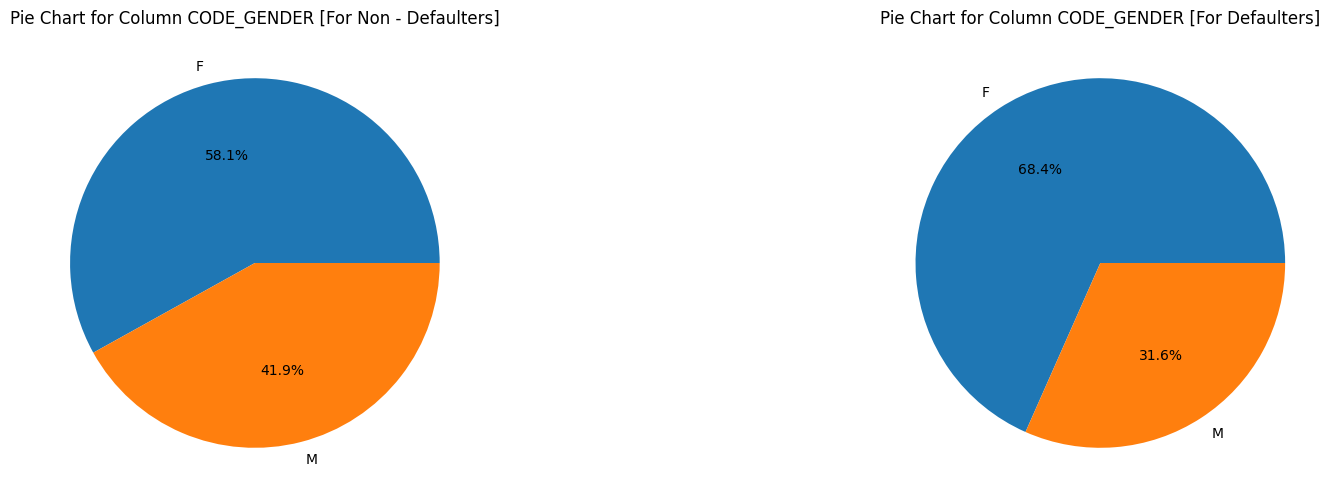

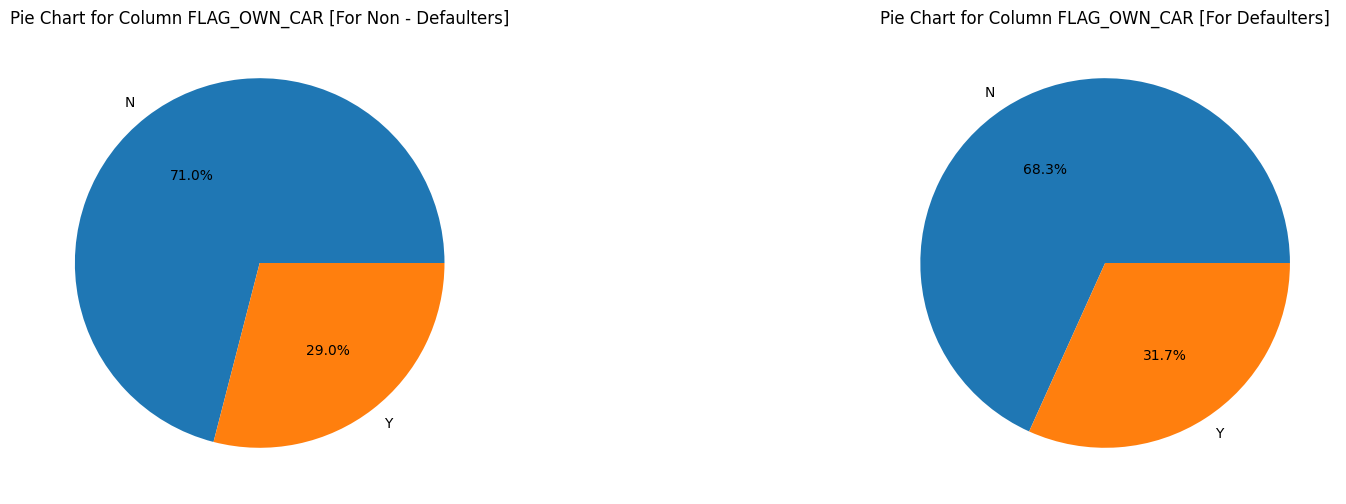

In [82]:
#Plotting the pie-charts
pie_plot('CODE_GENDER')
pie_plot('FLAG_OWN_CAR')

In [83]:
def barp_plot(col_name):
    plt.figure(figsize=[22,8])

    plt.subplot(1,2,1)
    target_1[col_name].value_counts().plot.barh()
    plt.title('Bar Chart for Column ' + col_name + ' [For target_1]')
    plt.xlabel('Number of Loan Applicantions',fontdict={'fontsize':20,'fontweight':5})
    plt.ylabel(col_name,fontdict={'fontsize':20,'fontweight':5})
    plt.subplot(1,2,2)
    target_0[col_name].value_counts().plot.barh()
    plt.title('Bar Chart for Column ' + col_name + ' [For target_0]')
    plt.xlabel('Number of Loan Applicantions',fontdict={'fontsize':20,'fontweight':5})
    plt.ylabel(col_name,fontdict={'fontsize':20,'fontweight':5})
    plt.tight_layout()
    plt.show()

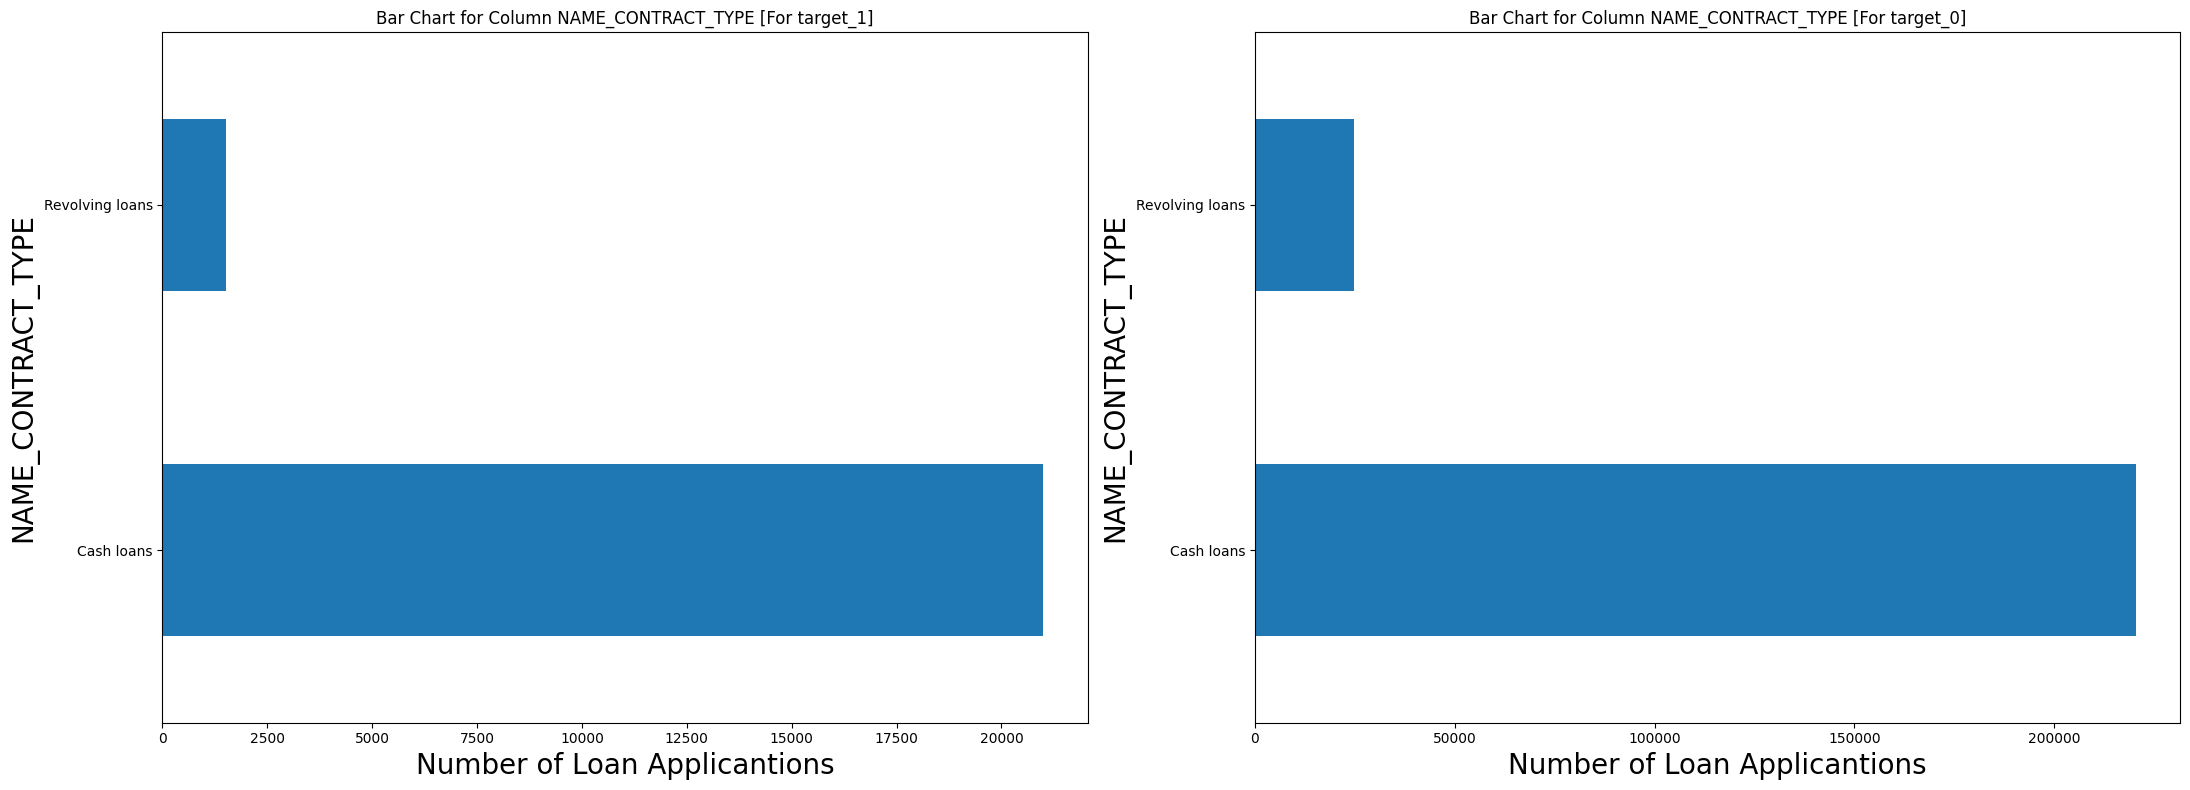

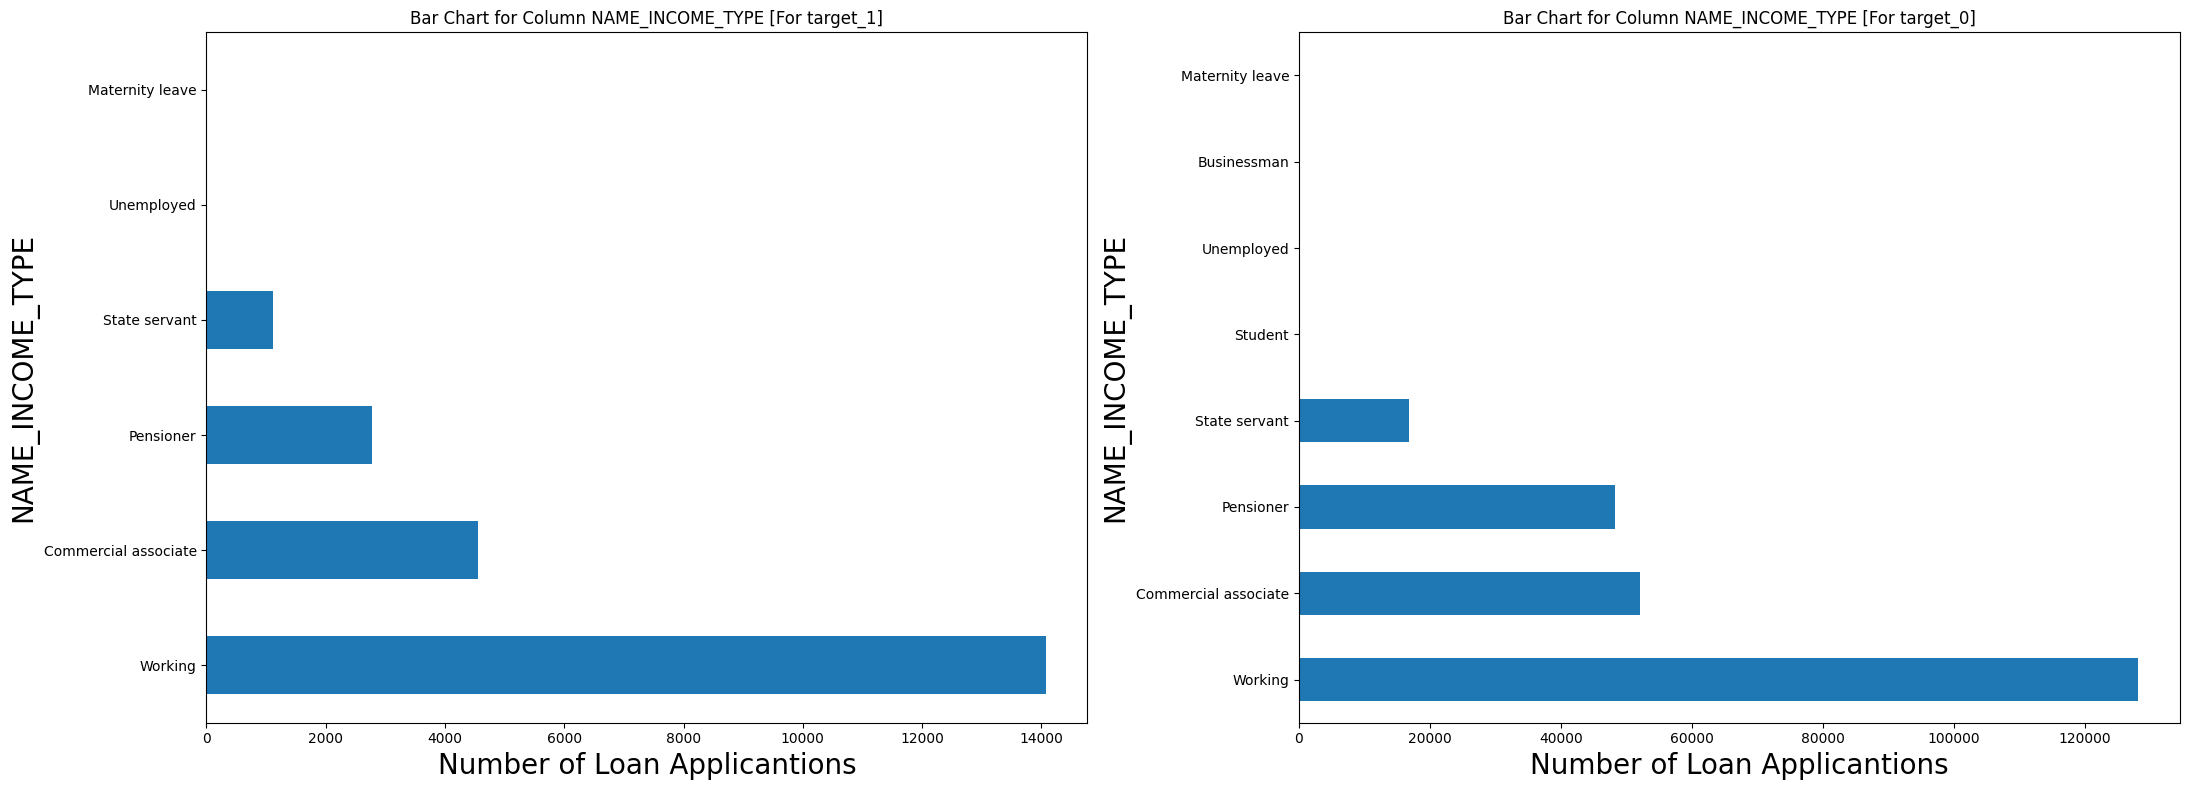

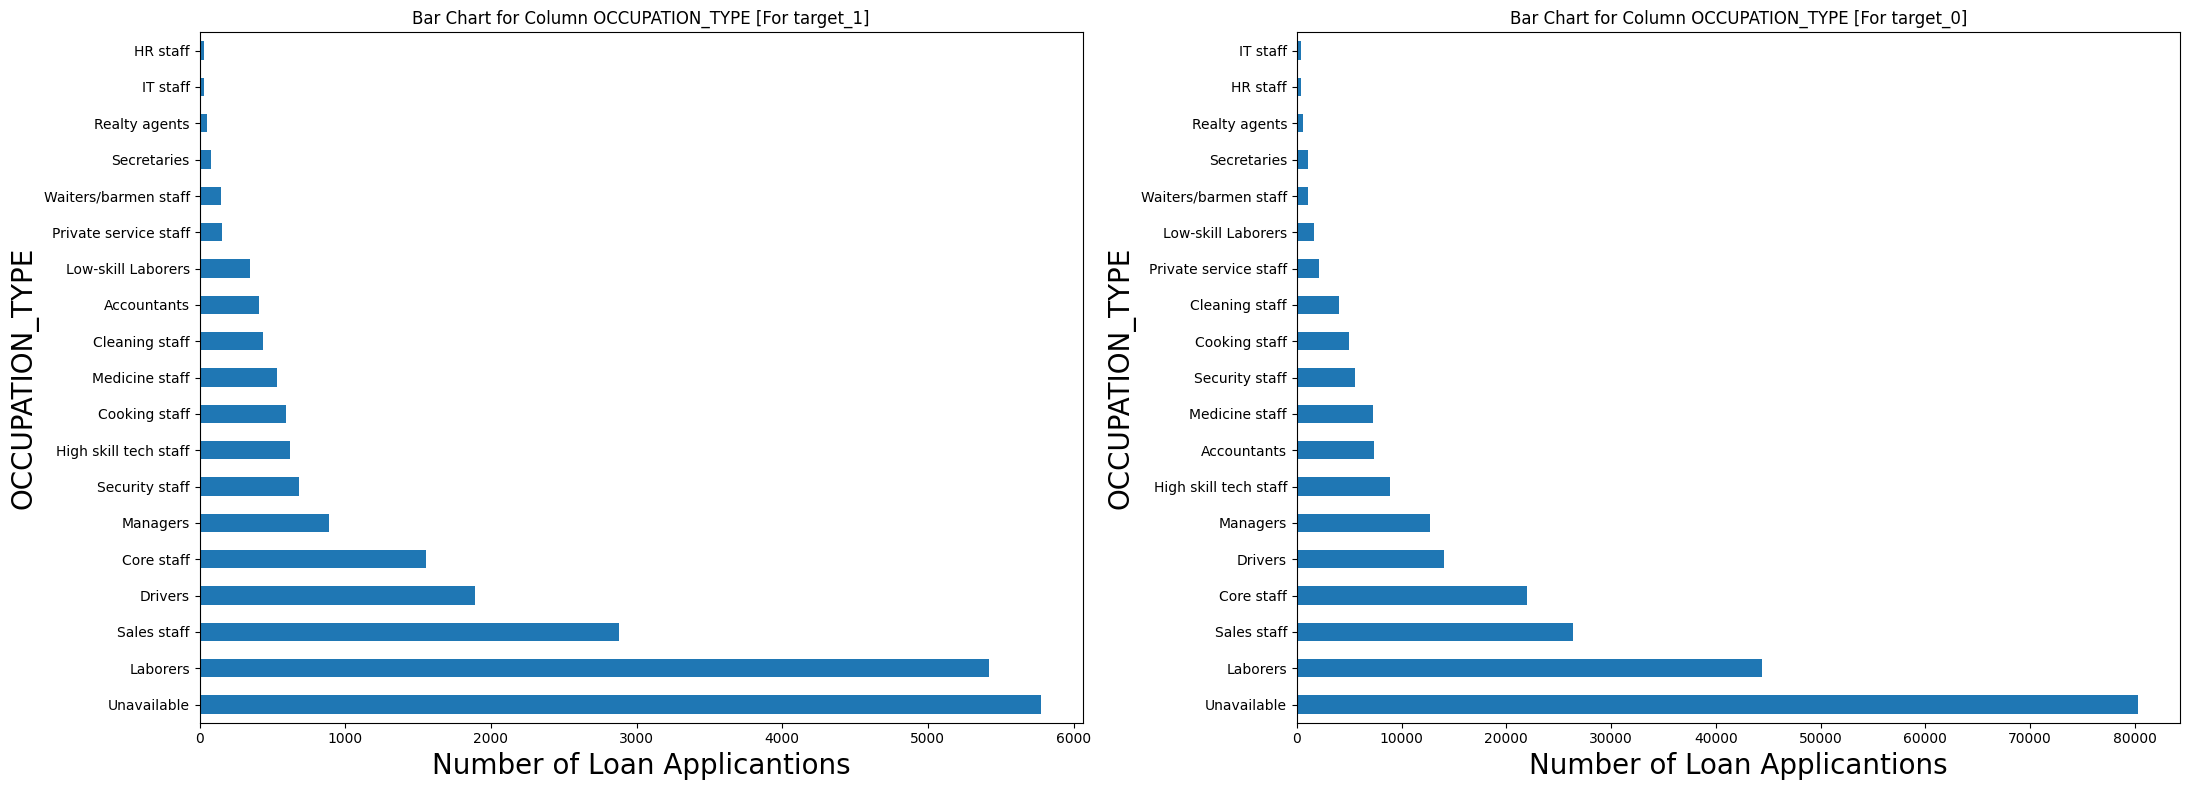

In [84]:
#Let's plot the bar plots
barp_plot('NAME_CONTRACT_TYPE')
barp_plot('NAME_INCOME_TYPE')
barp_plot('OCCUPATION_TYPE')

Number of applications with cash loans are higher than revolving loan in both defaulted and non-defaulted applications

People from working income background have applied higher number of loan applications than other income type and this category has highest defaulted loans

Occupation type which has highest number of defaulted and non-defaulted loans is unknown

##Multivariate Analysis

Correlation Matrix

In [85]:
#Creating correlation matrix for target 1
corr_mat_Day_1 = target_1[['CNT_CHILDREN','REGION_POPULATION_RELATIVE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_BIRTH']].corr()
corr_mat_Day_1

,CNT_CHILDREN,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_BIRTH
CNT_CHILDREN,1.000000,-0.031386,-0.009988,0.004779,0.038353,-0.003123,-0.196542,-0.260834
REGION_POPULATION_RELATIVE,-0.031386,1.000000,0.074575,0.044481,0.035538,0.054724,0.017735,0.049714
AMT_INCOME_TOTAL,-0.009988,0.074575,1.000000,0.285011,0.369377,0.285052,-0.132330,-0.024918
AMT_CREDIT,0.004779,0.044481,0.285011,1.000000,0.740489,0.977766,0.003992,0.135275
AMT_ANNUITY,0.038353,0.035538,0.369377,0.740489,1.000000,0.736081,-0.089403,-0.002289
AMT_GOODS_PRICE,-0.003123,0.054724,0.285052,0.977766,0.736081,1.000000,0.010169,0.136207
DAYS_EMPLOYED,-0.196542,0.017735,-0.132330,0.003992,-0.089403,0.010169,1.000000,0.593550
DAYS_BIRTH,-0.260834,0.049714,-0.024918,0.135275,-0.002289,0.136207,0.593550,1.000000


In [86]:
#Creating correlation matrix for target 0
corr_mat_Day_0= target_0[['CNT_CHILDREN','REGION_POPULATION_RELATIVE','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_BIRTH']].corr()
corr_mat_Day_0

,CNT_CHILDREN,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_BIRTH
CNT_CHILDREN,1.000000,-0.026339,0.027982,0.003359,0.023920,-0.001211,-0.254095,-0.341646
REGION_POPULATION_RELATIVE,-0.026339,1.000000,0.112574,0.036481,0.051740,0.042700,0.003095,0.028520
AMT_INCOME_TOTAL,0.027982,0.112574,1.000000,0.317633,0.395611,0.319001,-0.189968,-0.107645
AMT_CREDIT,0.003359,0.036481,0.317633,1.000000,0.762006,0.982101,-0.063257,0.047476
AMT_ANNUITY,0.023920,0.051740,0.395611,0.762006,1.000000,0.759404,-0.106236,-0.023417
AMT_GOODS_PRICE,-0.001211,0.042700,0.319001,0.982101,0.759404,1.000000,-0.060677,0.045653
DAYS_EMPLOYED,-0.254095,0.003095,-0.189968,-0.063257,-0.106236,-0.060677,1.000000,0.641875
DAYS_BIRTH,-0.341646,0.028520,-0.107645,0.047476,-0.023417,0.045653,0.641875,1.000000


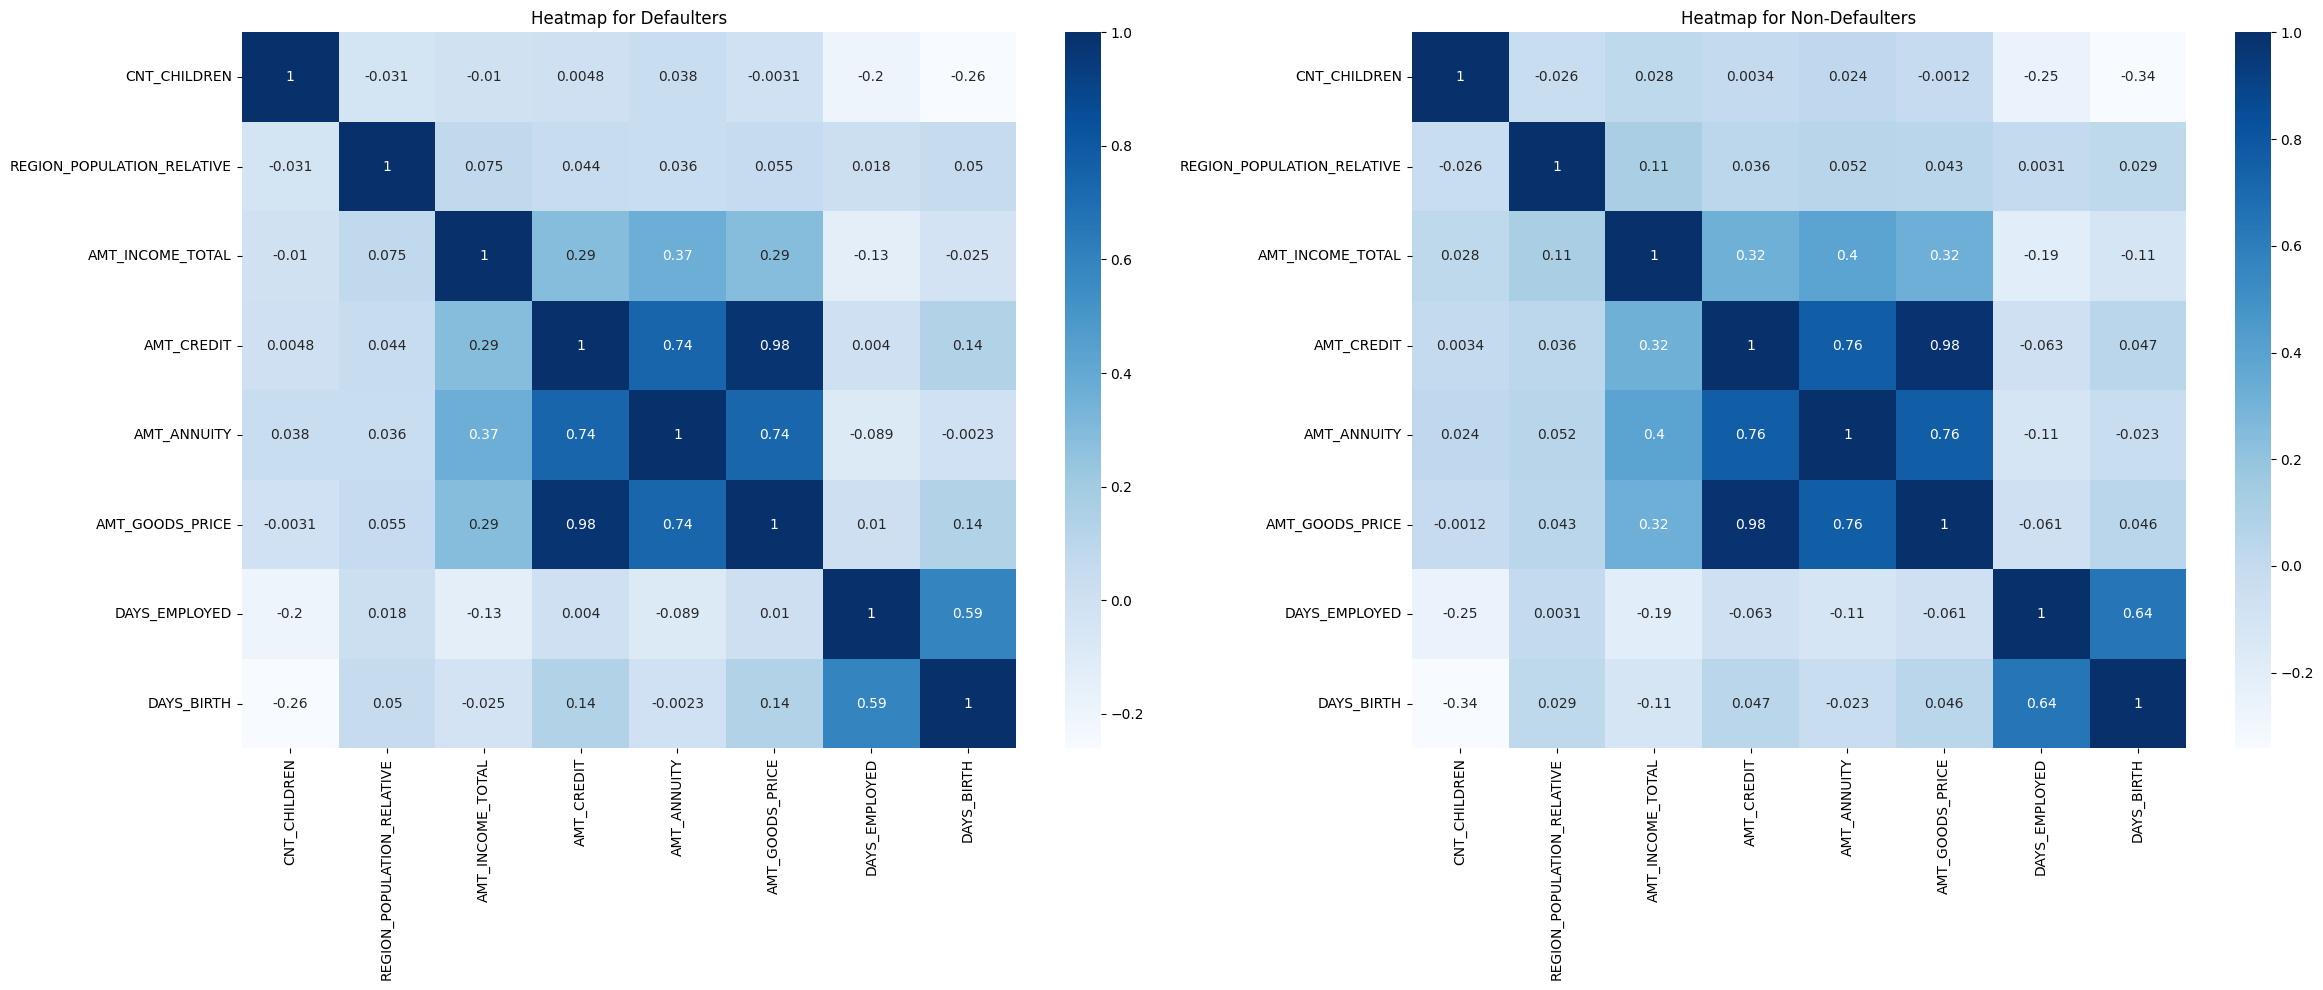

In [87]:
#Let's visualize the correlation matrix using Heatmap
plt.figure(figsize=[24, 10])

plt.subplot(1,2,1)
sns.heatmap(annot= True, data=corr_mat_Day_1, cmap='Blues').set(title='Heatmap for Defaulters')

plt.subplot(1,2,2)
sns.heatmap(annot= True, data=corr_mat_Day_0, cmap='Blues').set(title='Heatmap for Non-Defaulters')
plt.tight_layout()
plt.show()

From the above heatmap, it evident that there is strong correlation between the Goods Price and Loan Amount that was credited. Also, it can be seen that higher the age the number of days people were employed is also high.

On the other hand, There is weak correlation between the age and count of children and between the loan annuity and number of days applicant was employed

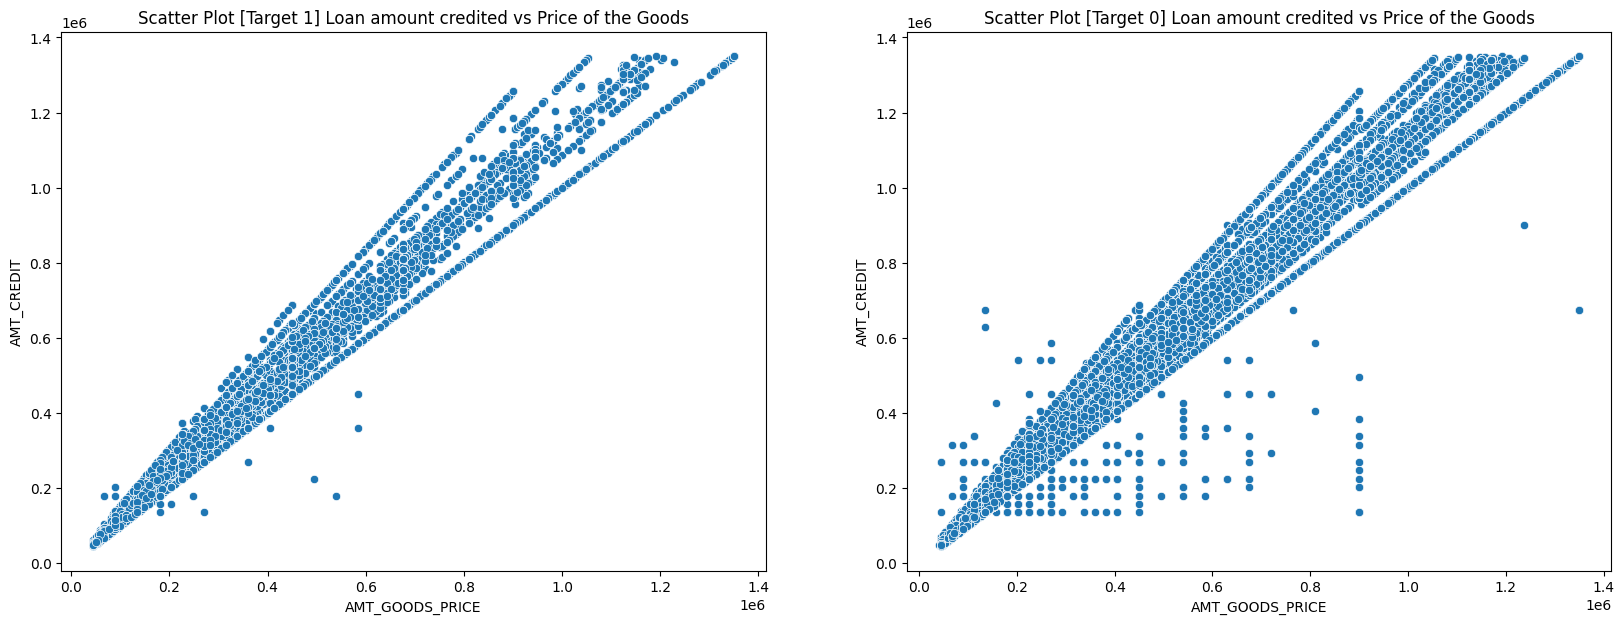

In [88]:
plt.figure(figsize=[20, 7])

plt.subplot(1,2,1)
sns.scatterplot(data=target_1, x='AMT_GOODS_PRICE', y='AMT_CREDIT').set(title='Scatter Plot [Target 1] Loan amount credited vs Price of the Goods')
plt.subplot(1,2,2)
sns.scatterplot(data=target_0, x='AMT_GOODS_PRICE', y='AMT_CREDIT').set(title='Scatter Plot [Target 0] Loan amount credited vs Price of the Goods')

plt.show()

From the above scatterplot, we can confirm that there is strong correlation between the Goods Price and Loan Amount that was credited.

In [89]:
#Creating a function to plot a boxplot with Eduction type and Family status
def box_plot_graph(df, y_value, title_graph):
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=45)
    sns.boxplot(data =df, x='NAME_EDUCATION_TYPE',y= y_value, hue ='NAME_FAMILY_STATUS',orient='v')
    plt.title(title_graph)
    plt.tight_layout()
    plt.show()

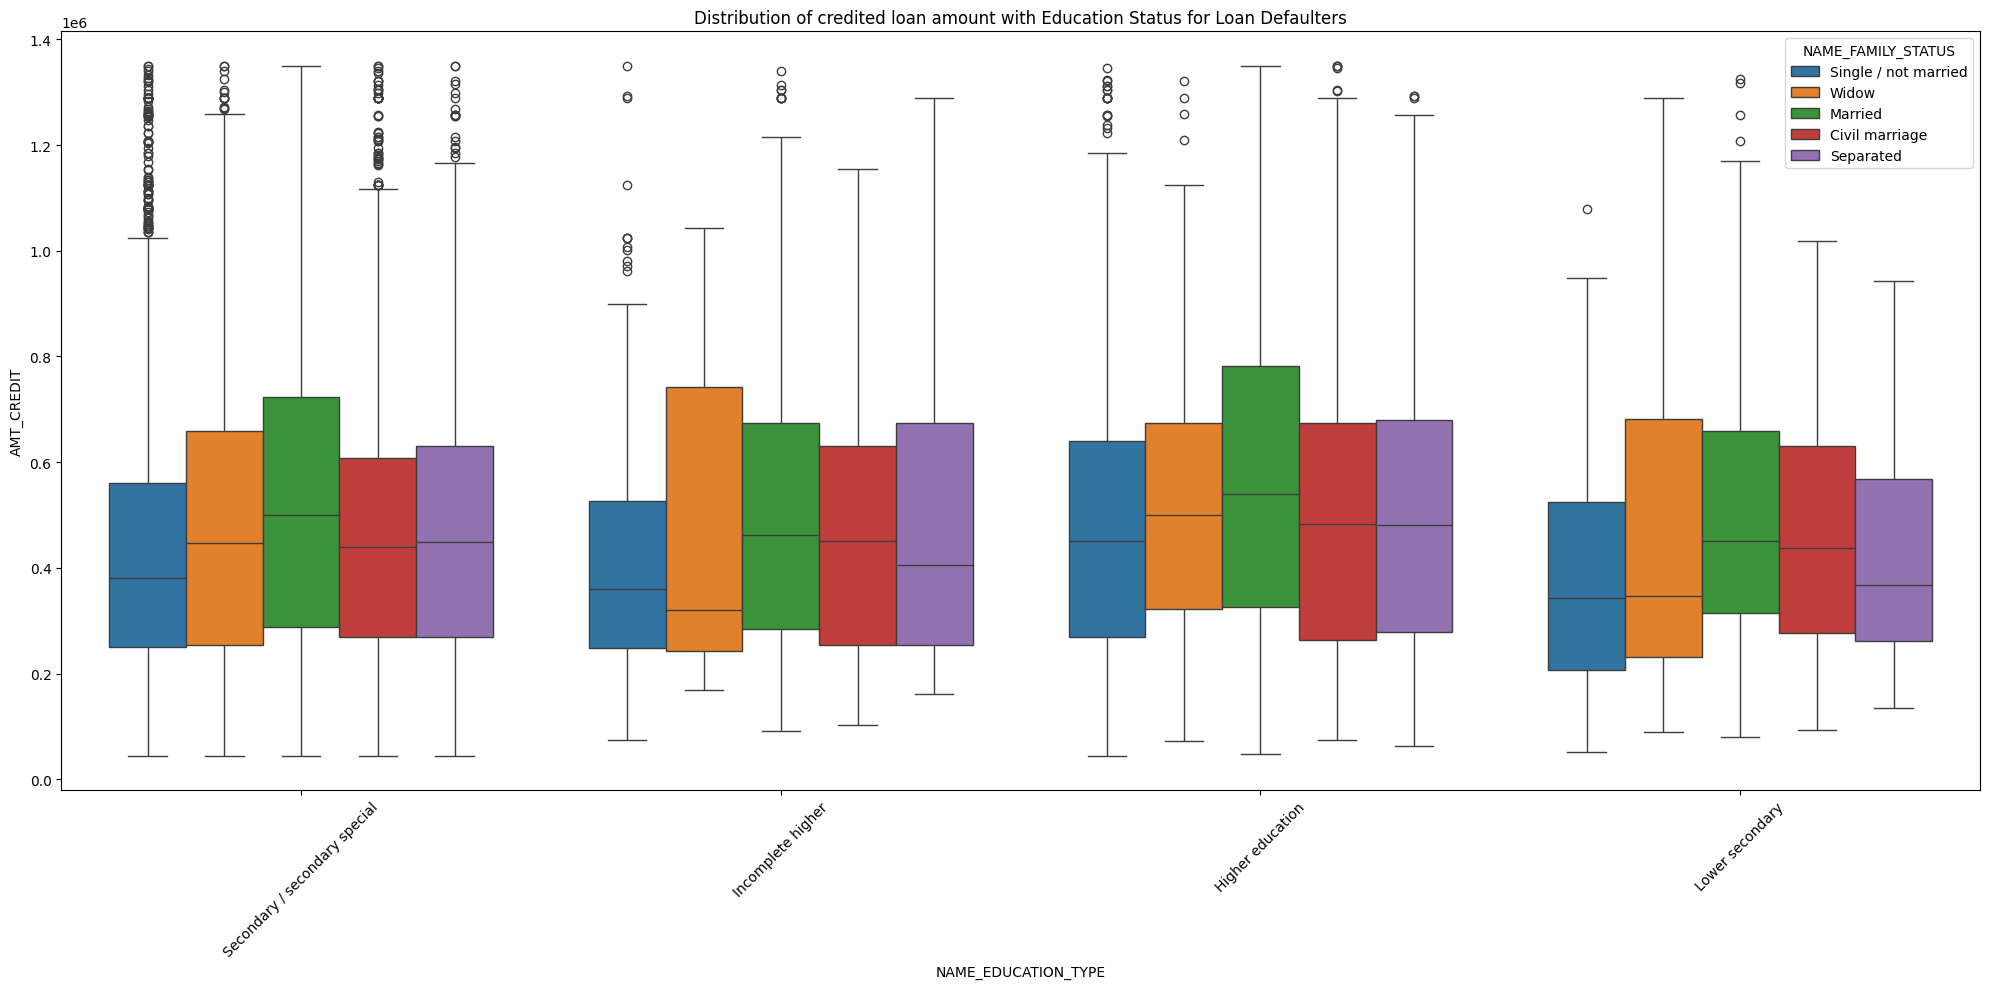

In [90]:
box_plot_graph(target_1, 'AMT_CREDIT', 'Distribution of credited loan amount with Education Status for Loan Defaulters')

Married people with higher education background have defaulted loans for higher distribution of credited loan amounts.

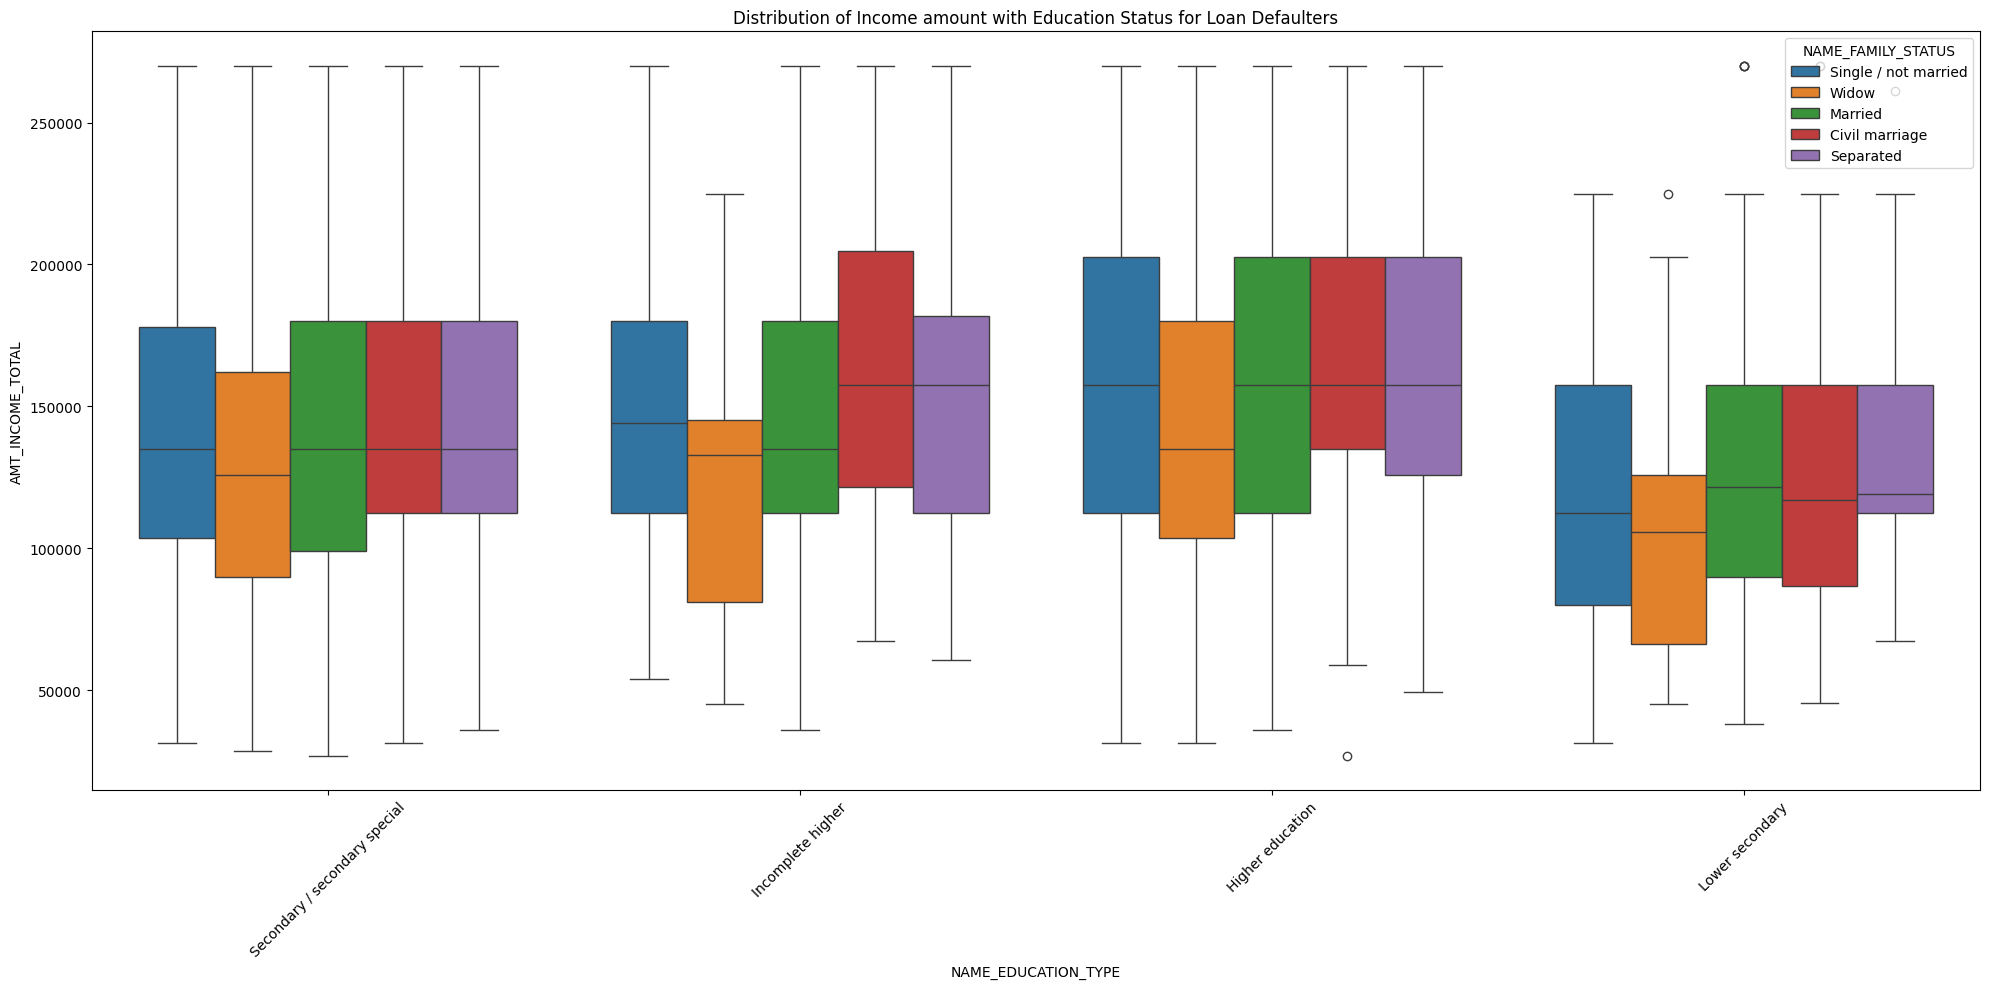

In [91]:
box_plot_graph(target_1, 'AMT_INCOME_TOTAL', 'Distribution of Income amount with Education Status for Loan Defaulters')

People with Academic degree have successful loans for higher distribution of credited loan amounts.

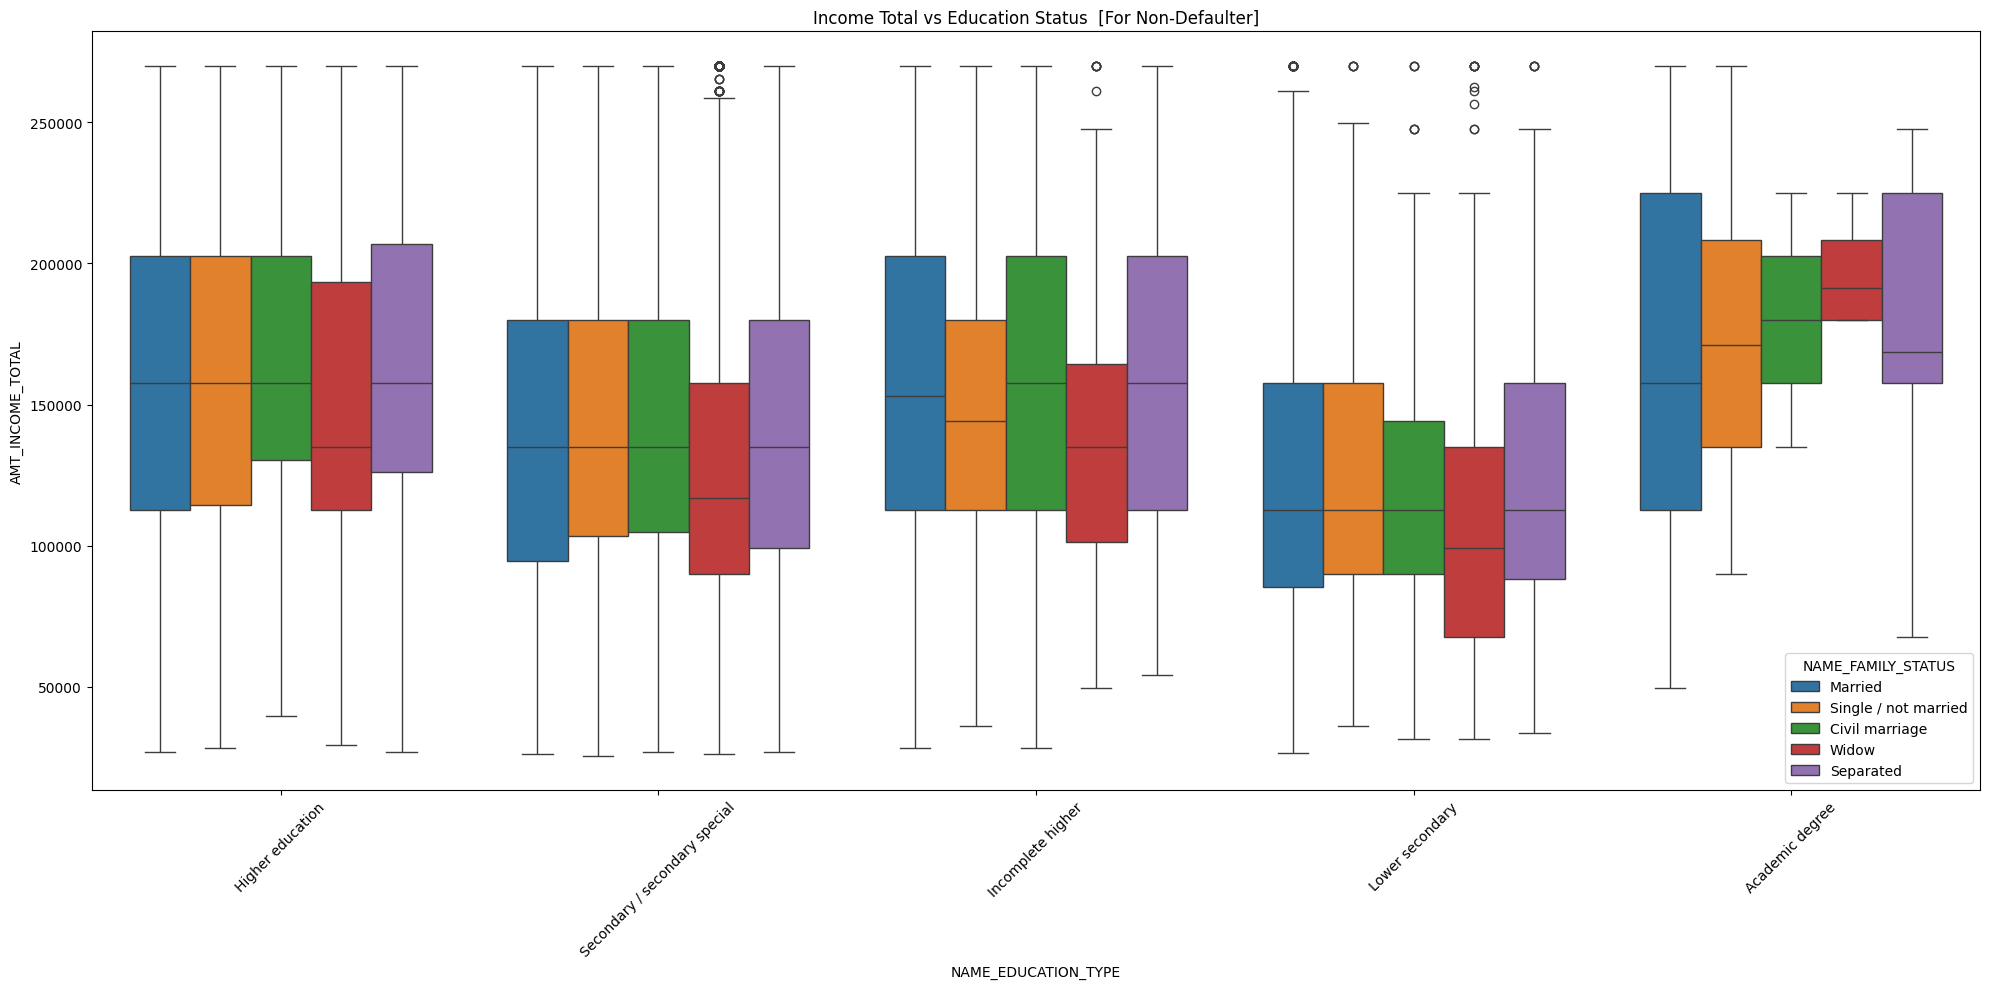

In [92]:
box_plot_graph(target_0, 'AMT_INCOME_TOTAL', 'Income Total vs Education Status  [For Non-Defaulter]')

People with Academic degree have most successful loans

**Merging the Datasets**

In [93]:
df_previous_app.shape

(1670214, 37)

In [94]:
data_prv_app_rows = df_previous_app.shape[0]
data_prv_app_cols = df_previous_app.shape[1]

In [95]:
print('Shape of Previous Applications Data: Rows',data_prv_app_rows,'Columns:',data_prv_app_cols)

Shape of Previous Applications Data: Rows 1670214 Columns: 37


In [96]:
#List of columns with missing values percentage greater than 40
prv_app_data_mis_vals = round(df_previous_app.isnull().sum()/data_prv_app_rows*100,2)
drop_cols_prv = prv_app_data_mis_vals[prv_app_data_mis_vals>50].index.tolist()

print('Number of Columns that have missing values percentage greater than 50%:', len(drop_cols_prv))

Number of Columns that have missing values percentage greater than 50%: 4


In [97]:
#Dropping the columns which have more than 50% missing values
df_previous_app.drop(labels=drop_cols_prv,axis=1,inplace=True)

In [98]:
# Now merging the Application dataset with previous appliaction dataset
final_df=pd.merge(left=app_data_final,right=df_previous_app,how='inner',on='SK_ID_CURR')
final_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=107)

In [99]:
#Renaming the columns after merger of datasets
final_df.rename({'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE_APP','AMT_CREDIT_x':'AMT_CREDIT_APP',
'AMT_ANNUITY_x':'AMT_ANNUITY_APP', 'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE_APP',
'WEEKDAY_APPR_PROCESS_START_x':'WEEKDAY_APPR_PROCESS_START_APP', 'HOUR_APPR_PROCESS_START_x':'HOUR_APPR_PROCESS_START_APP',
'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PRV', 'AMT_ANNUITY_y':'AMT_ANNUITY_PRV',
'AMT_CREDIT_y':'AMT_CREDIT_PRV', 'AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PRV',
'WEEKDAY_APPR_PROCESS_START_y':'WEEKDAY_APPR_PROCESS_START_PRV', 'HOUR_APPR_PROCESS_START_y':'HOUR_APPR_PROCESS_START_PRV'}, axis=1, inplace=True)

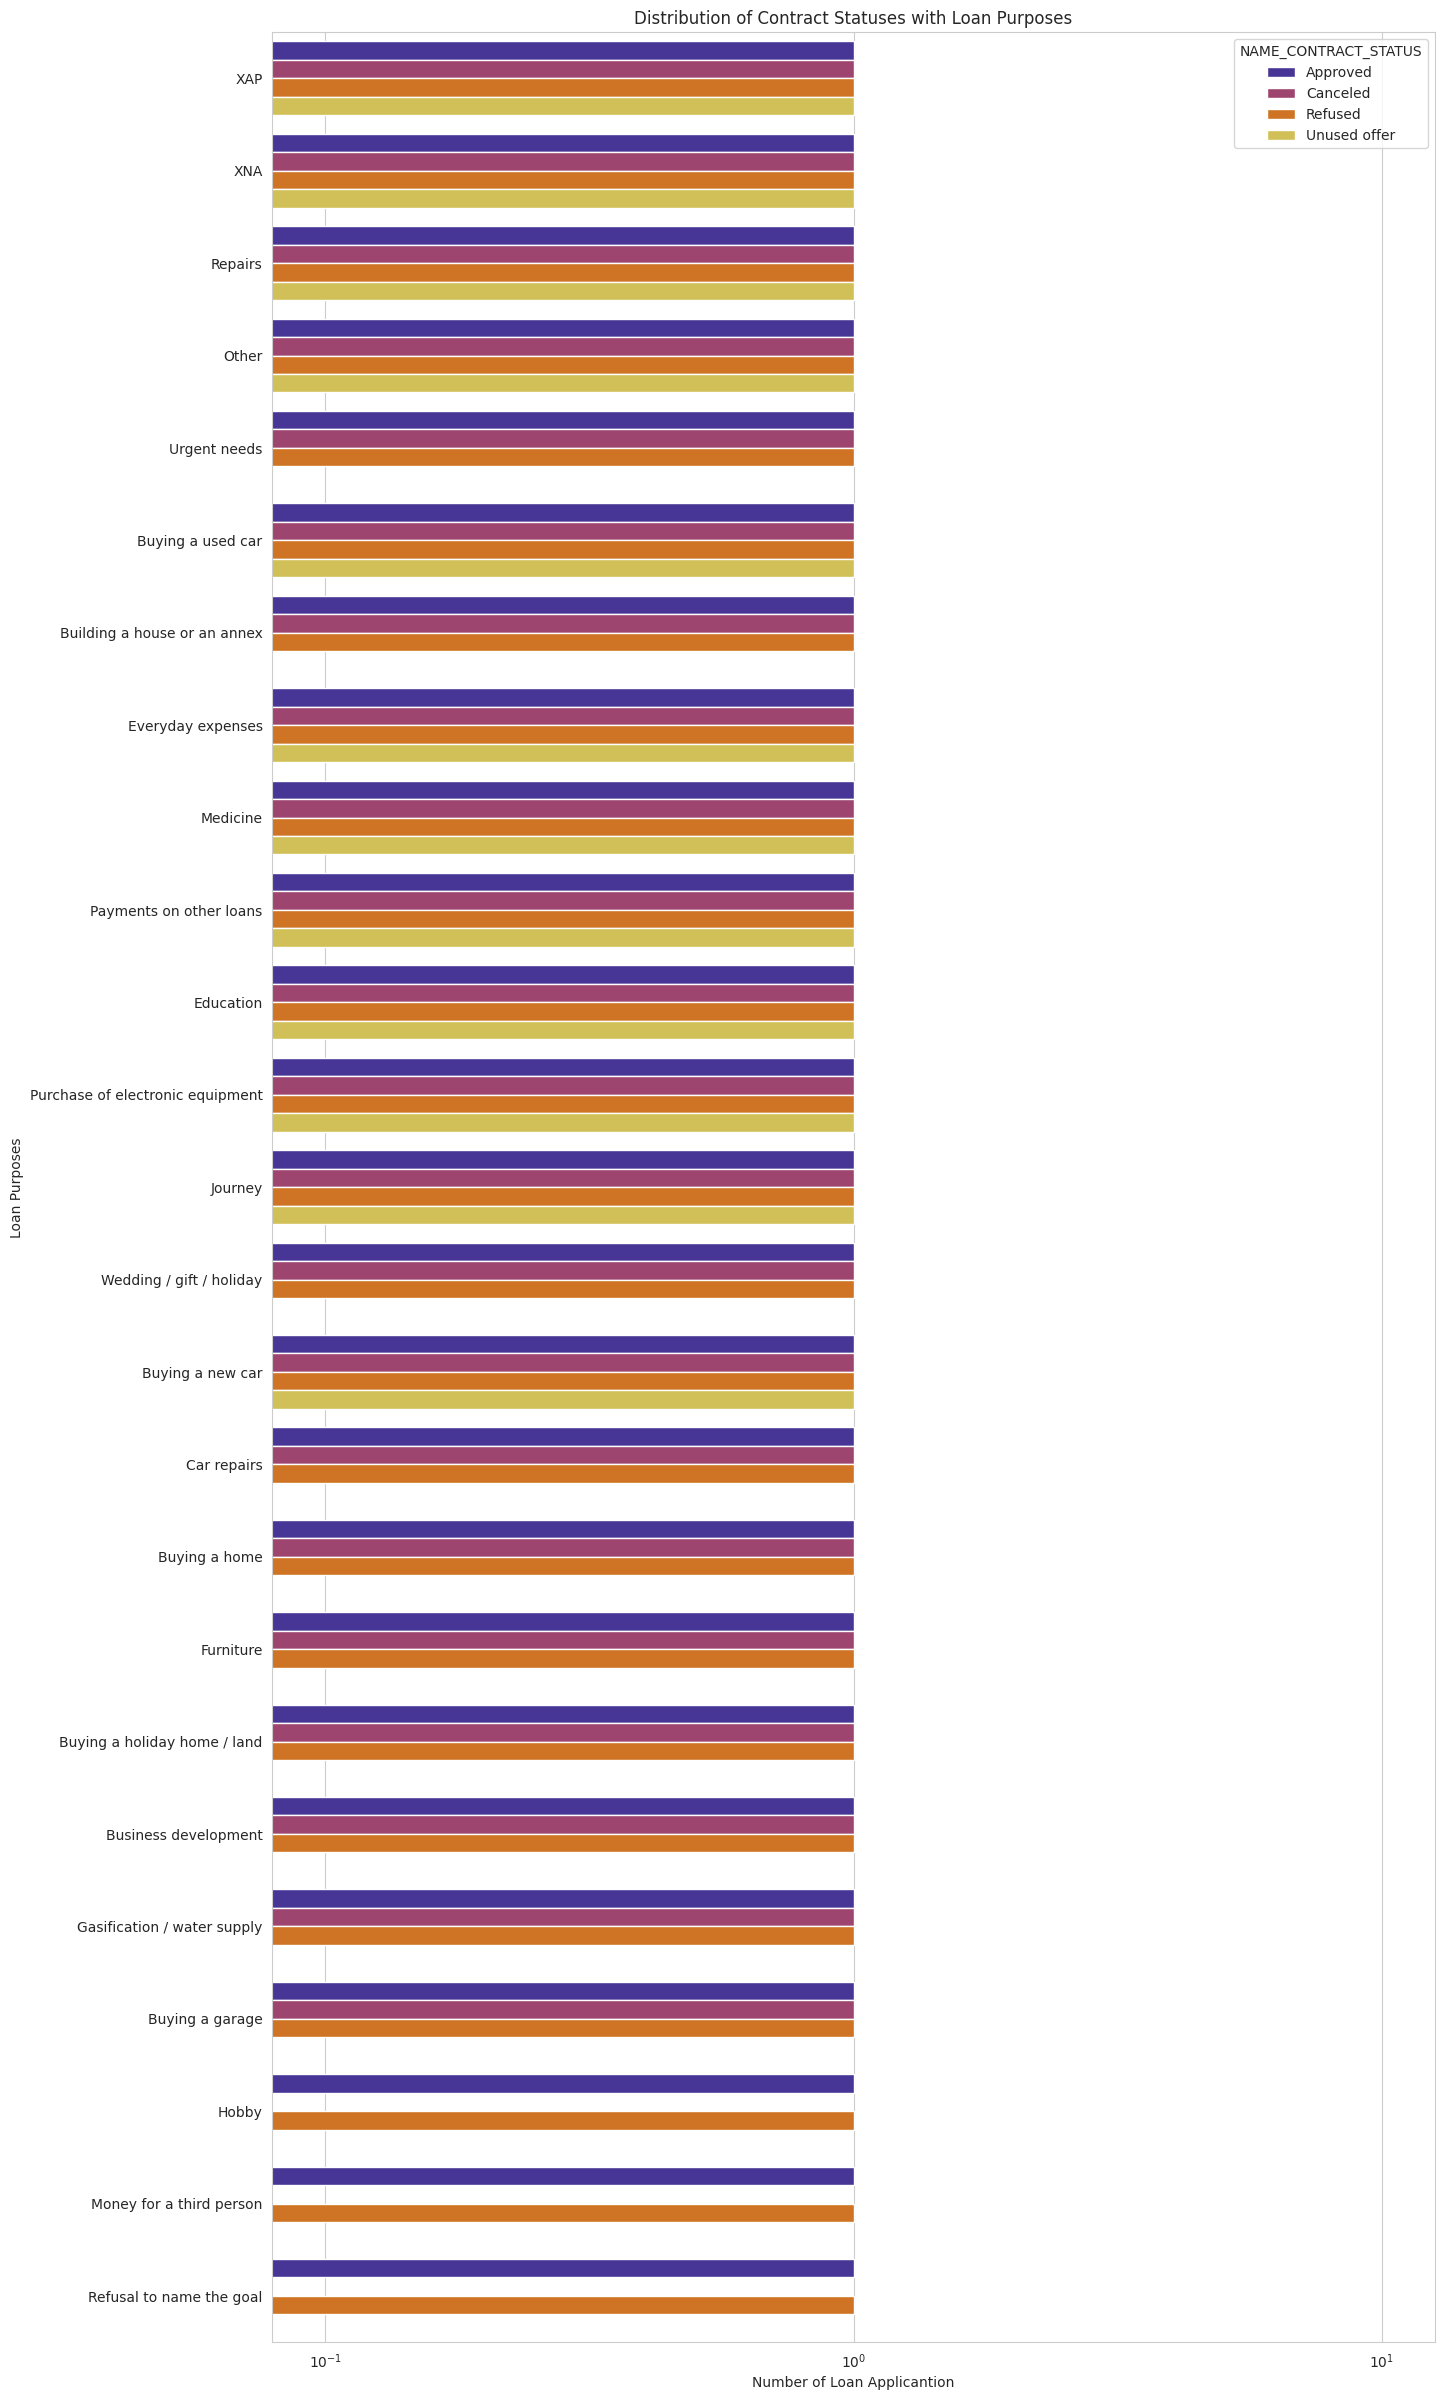

In [100]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
plt.figure(figsize=(15,30))
plt.xscale('log')
plt.title('Distribution of Contract Statuses with Loan Purposes')
ax = sns.countplot(data = final_df, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=final_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='CMRmap')
plt.xlabel('Number of Loan Applicantion')
plt.ylabel('Loan Purposes')
plt.show()

When customers do not communicate their purpose for the loan bank has approved low number of applications.

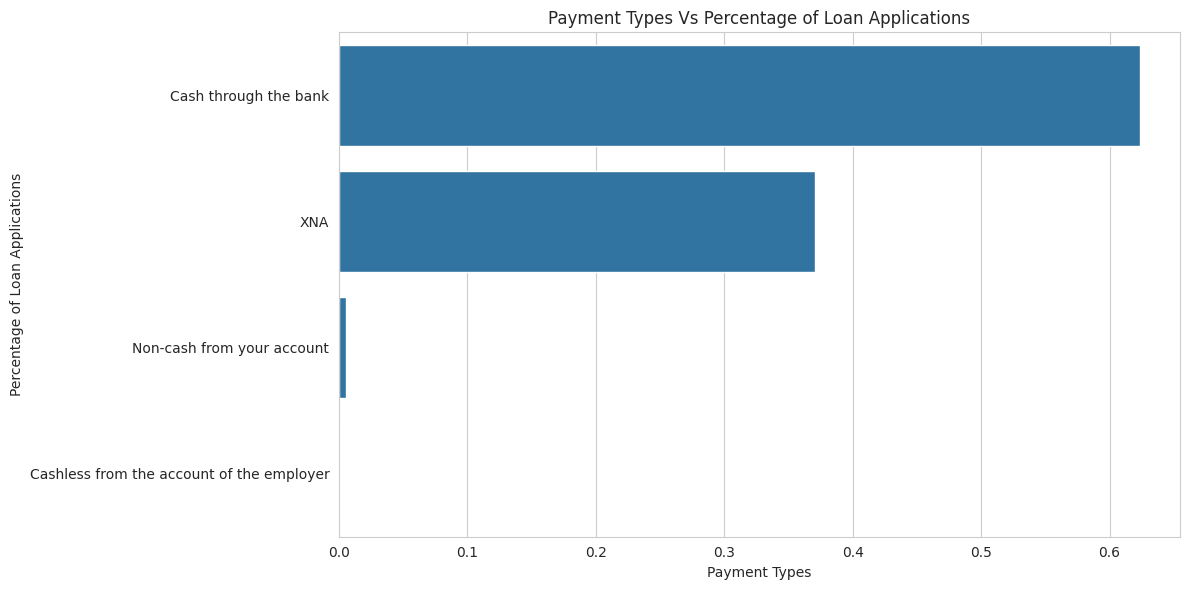

In [101]:
plt.figure(figsize=[12,6])
Payment_Type = final_df['NAME_PAYMENT_TYPE'].value_counts(normalize=True).to_frame(name='Percentage of Loan Applications')
sns.barplot(data=Payment_Type, y=Payment_Type.index, x=Payment_Type['Percentage of Loan Applications'],orient='h')
plt.title('Payment Types Vs Percentage of Loan Applications')
plt.xlabel('Payment Types')
plt.ylabel('Percentage of Loan Applications')
plt.tight_layout()
plt.show()

Most of the previous loans were repaid by Cash deposits.

The second highest mode of previous loan repayment has undisclosed methods (XNAs)

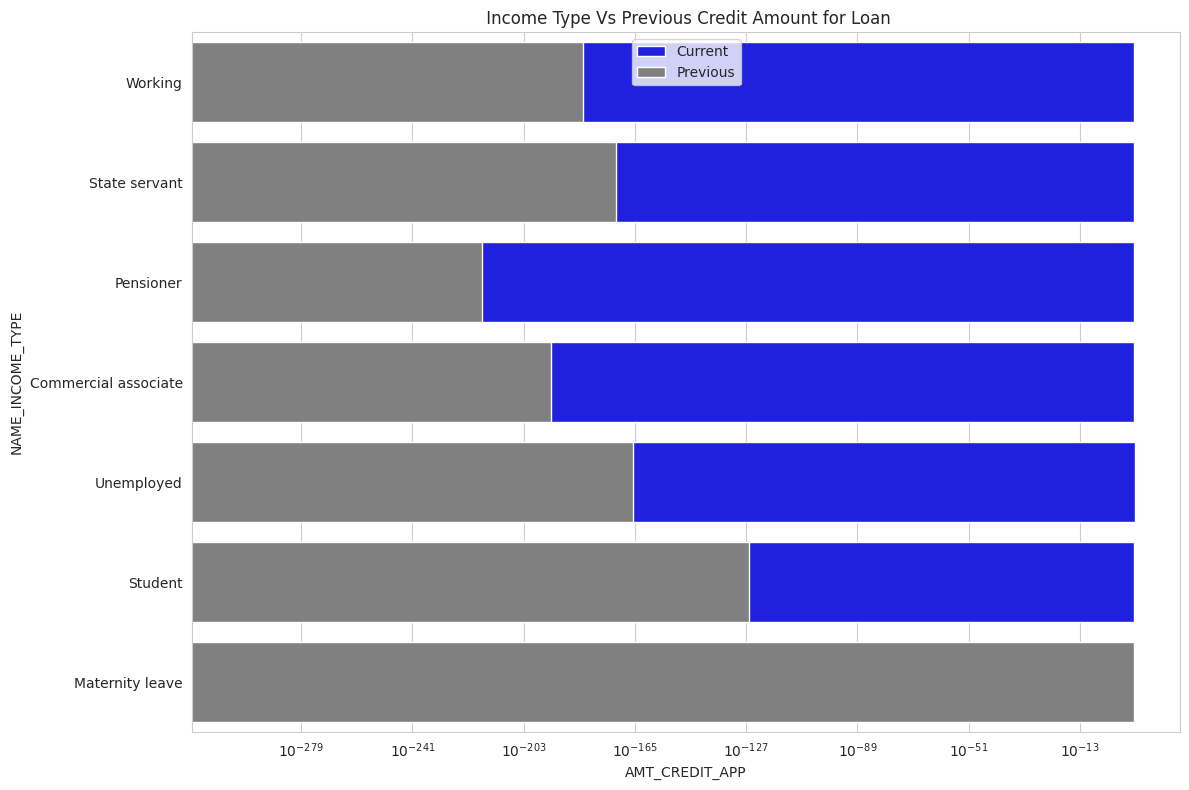

In [107]:
plt.figure(figsize=(12,8))
plt.xscale('log')
plt.title(' Income Type Vs Previous Credit Amount for Loan')
sns.barplot(data=final_df, y=final_df.NAME_INCOME_TYPE, x=final_df.AMT_CREDIT_APP,color='Blue',errwidth=0,label='Current')
sns.barplot(data=final_df, y=final_df.NAME_INCOME_TYPE, x=final_df.AMT_CREDIT_PRV,color='Grey',errwidth=0,label='Previous')
plt.legend()
plt.tight_layout()
plt.show()

The loan amount that is credited in the current application is higher than that in previous application for working, state servant, unemployed and Student.

Highest loan amount is credited for people on maternity leave in previous application and nil in current application

In [103]:
#Creating a funtion to plot barplot
def bar_plot_graph(df, y_label, x_label, hue_value, title, orien, width, length, scale):
    plt.figure(figsize=(width,length))
    plt.xticks(rotation=90)
    if scale == 'xscale':
        plt.xscale('log')
    else:
        plt.yscale('log')
    sns.barplot(data =final_df, y=y_label, hue=hue_value, x=x_label, errwidth=0, orient= orien)
    plt.title(title)
    plt.tight_layout()
    plt.show()

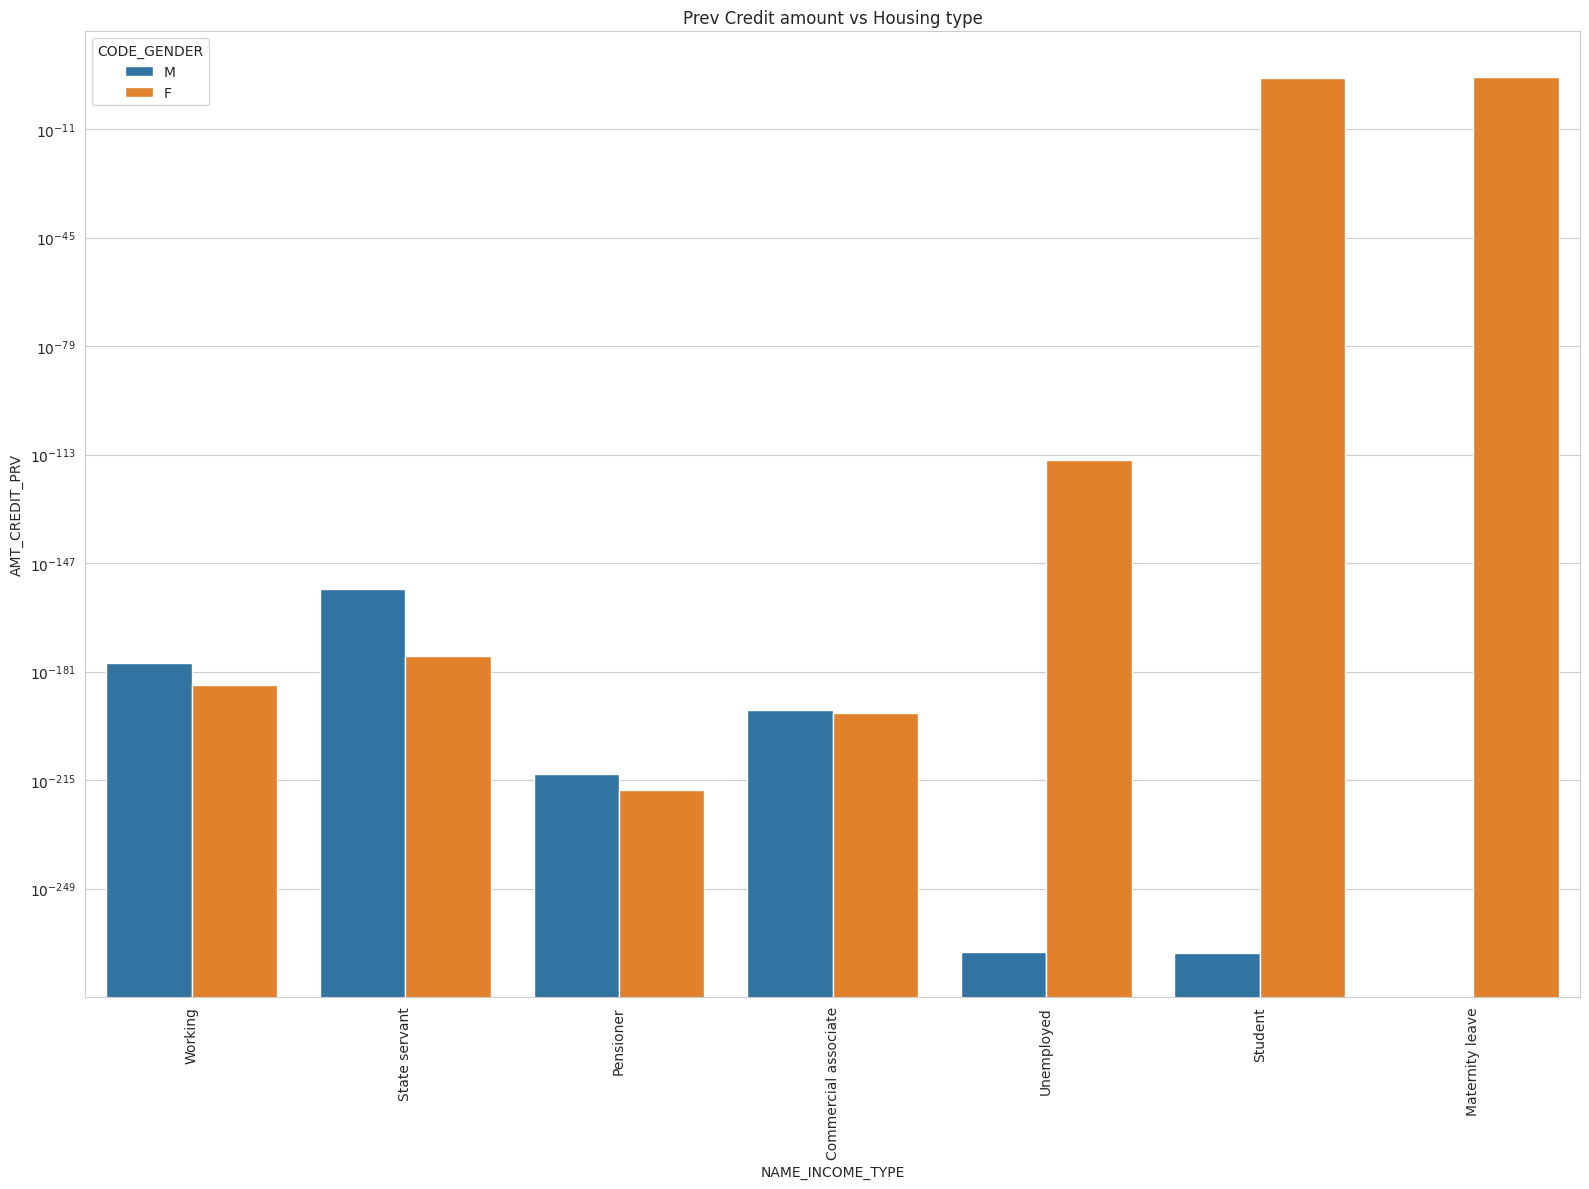

In [104]:
bar_plot_graph(final_df, 'AMT_CREDIT_PRV', 'NAME_INCOME_TYPE', 'CODE_GENDER', 'Prev Credit amount vs Housing type', 'v', 16, 12, 'yscale')

Unemployed and Student Females were given higher loan amount compared to males
and in all other categories Males are given slightly more loan amount.


In [105]:
#Let's create a correlation matrix on final dataset
corr_mat_final = final_df[['AMT_INCOME_TOTAL',
       'AMT_CREDIT_APP', 'AMT_ANNUITY_APP', 'AMT_GOODS_PRICE_APP','CNT_CHILDREN','CNT_FAM_MEMBERS','DAYS_BIRTH','AMT_APPLICATION','AMT_ANNUITY_PRV',
        'AMT_CREDIT_PRV', 'AMT_GOODS_PRICE_PRV']].corr()
corr_mat_final

,AMT_INCOME_TOTAL,AMT_CREDIT_APP,AMT_ANNUITY_APP,AMT_GOODS_PRICE_APP,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_BIRTH,AMT_APPLICATION,AMT_ANNUITY_PRV,AMT_CREDIT_PRV,AMT_GOODS_PRICE_PRV
AMT_INCOME_TOTAL,1.000000,0.299009,0.377697,0.298530,0.016500,0.015978,-0.082661,0.121722,0.197815,0.123144,0.162010
AMT_CREDIT_APP,0.299009,1.000000,0.755557,0.981836,0.005536,0.063476,0.035891,0.089800,0.106909,0.090529,0.104761
AMT_ANNUITY_APP,0.377697,0.755557,1.000000,0.752523,0.033572,0.089610,-0.049714,0.081946,0.151054,0.079861,0.099346
AMT_GOODS_PRICE_APP,0.298530,0.981836,0.752523,1.000000,0.000880,0.061473,0.034870,0.091489,0.107900,0.090509,0.105324
CNT_CHILDREN,0.016500,0.005536,0.033572,0.000880,1.000000,0.877621,-0.366131,-0.035949,-0.044635,-0.036404,-0.053769
CNT_FAM_MEMBERS,0.015978,0.063476,0.089610,0.061473,0.877621,1.000000,-0.330692,-0.005323,-0.010002,-0.004286,-0.014372
DAYS_BIRTH,-0.082661,0.035891,-0.049714,0.034870,-0.366131,-0.330692,1.000000,0.079179,0.084459,0.077097,0.110938
AMT_APPLICATION,0.121722,0.089800,0.081946,0.091489,-0.035949,-0.005323,0.079179,1.000000,0.810703,0.972845,0.999850
AMT_ANNUITY_PRV,0.197815,0.106909,0.151054,0.107900,-0.044635,-0.010002,0.084459,0.810703,1.000000,0.823393,0.825737
AMT_CREDIT_PRV,0.123144,0.090529,0.079861,0.090509,-0.036404,-0.004286,0.077097,0.972845,0.823393,1.000000,0.992727


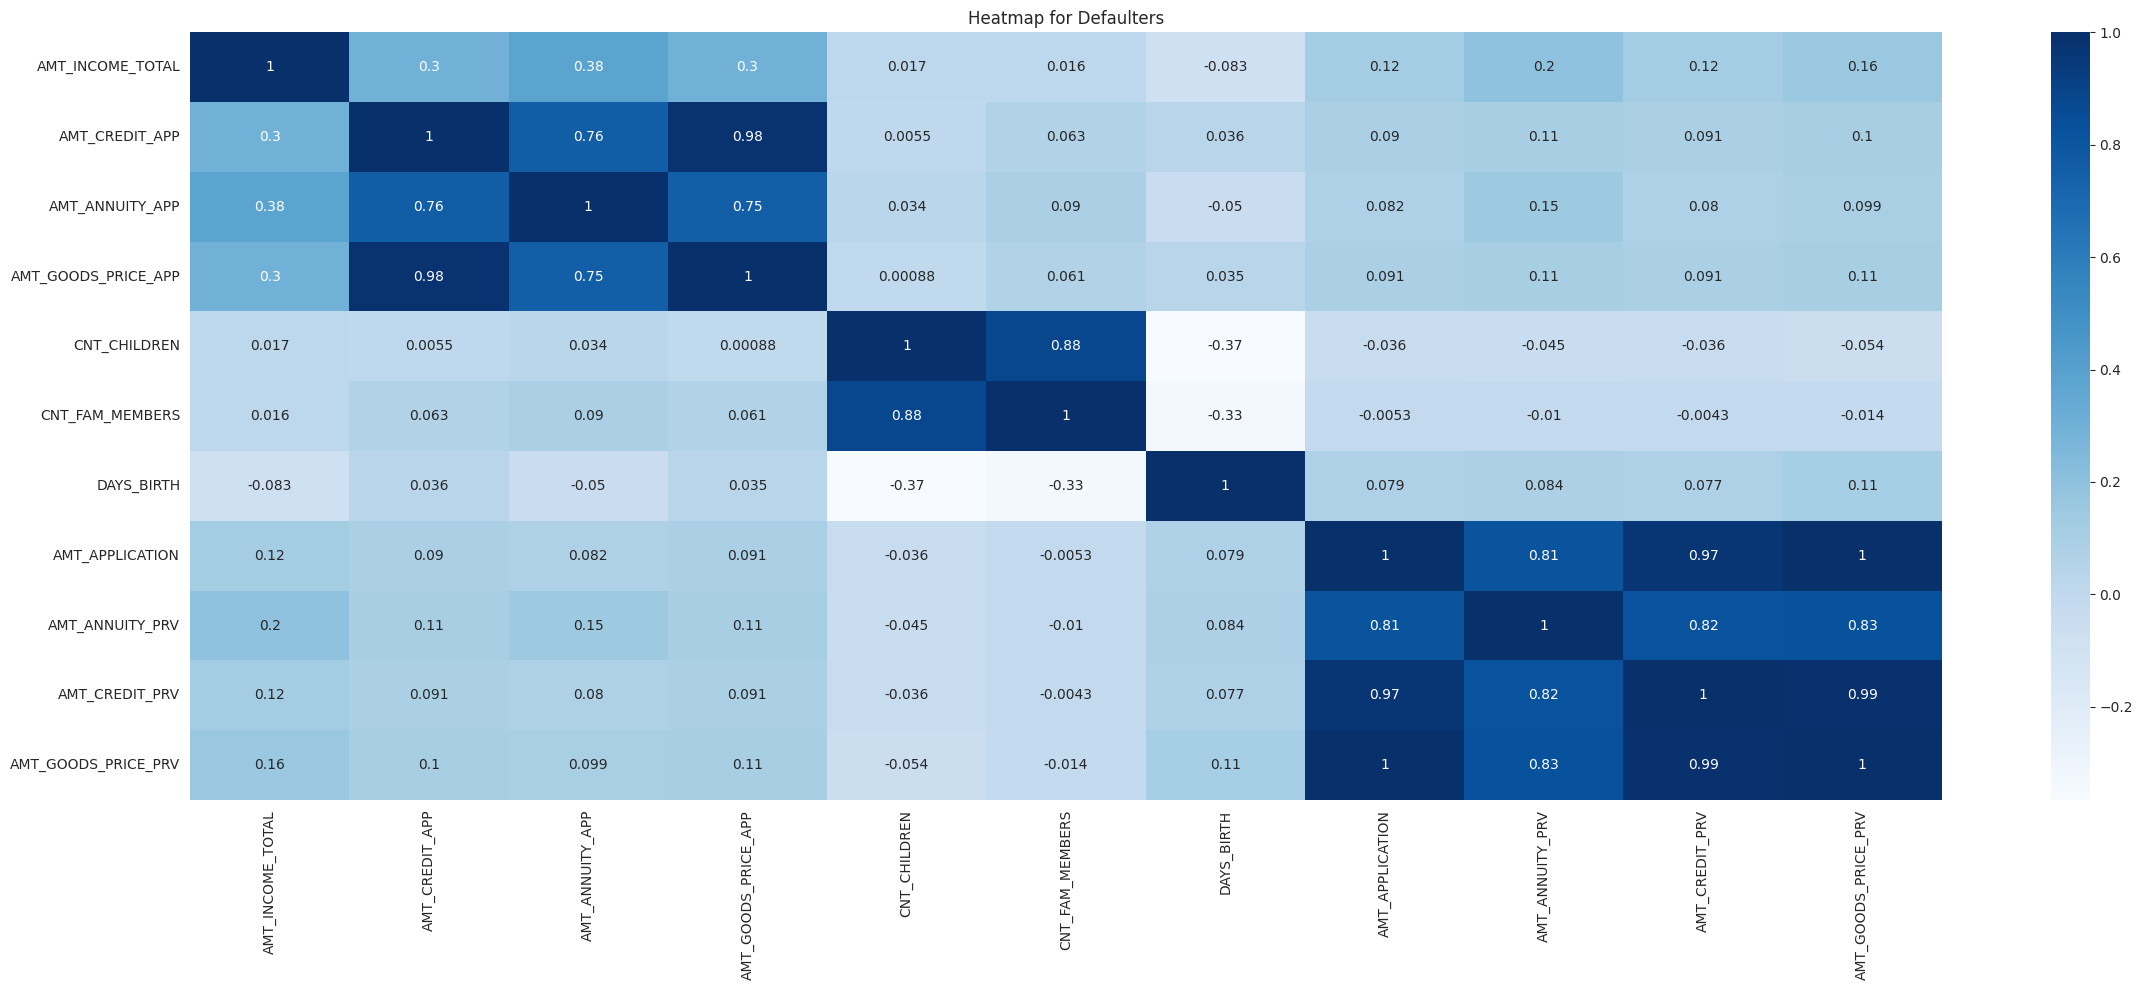

In [106]:
#Let's now plot the correlation matrix with heatmap
plt.figure(figsize=[24, 10])

sns.heatmap(annot= True, data=corr_mat_final, cmap='Blues')
plt.title('Heatmap for Defaulters')
plt.tight_layout()
plt.show()

From the above heatmap, it evident that there is strong correlation between the Goods Price and Loan Amount of current application that is credited. Also, there is strong correlation between the Loan Amount asked by applicant and Loan Amount credited in previous application.

On the other hand, There is weak correlation between the age and count of children and Count of family members.

#Conclusion

Through this assignment, we successfully addressed missing values, analyzed variable distributions, managed outliers, and uncovered relationships between attributes, ensuring a clean and insightful dataset for further analysis.

Some of the findings include-

*  Applicants having an academic degree have defaulted less number of loans compared to applicants from other educational backgrounds
*  Married people with higher education background have defaulted loans for higher
distribution of credited loan amounts.
*  People with higher secondary education have defaulted loans with higher loan amounts.
*  Number of defaulters are higher in females than males.
*  There is strong relation in loan amount credited by bank and loan amount asked by customer against goods.
*  Also with loan purpose ‘Repair’ is having higher number of approved and rejected loans.
*  Bank is expected to receive higher number of loan applications on Tuesdays than other days







